In [1]:
import tomosipo as ts
import numpy as np
import pickle
import mrcfile
from scipy.ndimage import zoom
%matplotlib inline


In [2]:
vg = ts.volume(shape=(32, 32, 32), size=(1, 1, 1))
pg = ts.parallel(angles=32, shape=(48, 48), size=(1.5, 1.5))

In [3]:
svg = ts.svg(vg, pg)
svg.save("./doc/img/intro_forward_projection_geometries.svg")

In [4]:
A = ts.operator(vg, pg)


In [5]:
x = np.ones(A.domain_shape, dtype=np.float32)

In [6]:
y = A(x)

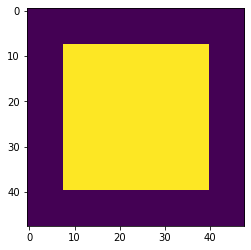

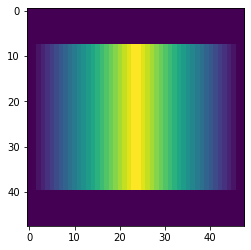

In [7]:
import matplotlib.pyplot as plt
plt.imshow(y[:, 0, :]) # first projection
plt.show()
plt.imshow(y[:, 8, :]) # quarter rotation
plt.show()

In [8]:
"""
Load 3DVA angles
"""
f = open('./data/angles_3DVA.txt')
text = []
for line in f:
    floats_list = [float(item) for item in line.split()]

    text.append(floats_list[:3])
angles = np.array(text)
print(np.max(angles[:, 0]))
print(np.max(angles[:, 1]))
print(np.max(angles[:, 2]))
angles[:, 0] = angles[:, 0] / 360 * 2 *np.pi
angles[:, 1] = angles[:, 0] / 360 * 1 *np.pi
angles[:, 2] = angles[:, 0] / 360 * 2 *np.pi

print(angles[:5])
print(angles.shape)
angles2 = angles

359.95001
178.00002
359.95105
[[2.28411239 0.01993264 0.03986528]
 [2.05058716 0.01789475 0.0357895 ]
 [6.10777989 0.05330043 0.10660087]
 [0.75984672 0.00663091 0.01326183]
 [5.85749933 0.05111632 0.10223265]]
(9453, 3)


In [9]:
"""
Load 3DVA order
"""
f = open('./data/70S_5class_simu_labels.txt')
text = []
for line in f:
    intlist = [int(item) for item in line.split()]

    text.append(intlist[0])
print(text[:5])
S_count = []
for i in range(5):
    S_count.append( text.count(i))
    print(i, text.count(i))
Index_3DVA = text
#You can see that the mean structure is 

[3, 0, 2, 0, 2]
0 2804
1 1904
2 1911
3 1417
4 1417


In [10]:
with open('./data/3DVA_images_22.pkl', 'rb') as f:
    new_projection = pickle.load(f)

In [11]:
print(new_projection.shape)

(9453, 34, 34)


In [12]:
import astra
ProjSize = 34
with open('./data/3DVA_Orientation_Vectors.pkl', 'rb') as handle:
    Orientation_Vectors = pickle.load(handle  )
Orientation_Vectors = Orientation_Vectors
print(Orientation_Vectors.shape)
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
print(Orientation_Vectors.shape)

(9453, 12)
(9453, 12)


In [13]:
from tomosipo.geometry.parallel_vec import *
#pg = ParallelVectorGeometry.from_astra(Proj_geom)
pg = ts.from_astra(Proj_geom)

In [14]:
#vg = ts.volume(shape=(32, 32, 32), size=(1, 1, 1))
#pg = ts.parallel(angles=50, shape=(48, 48), size=(1.5, 1.5))
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
Vol_geom = astra.create_vol_geom(34, 34, 34)
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
A = ts.operator(vg, pg)
from scipy.ndimage import zoom


In [15]:
print(pg.ray_dir[:5])
print(pg.det_v[:5])
print(pg.det_u[:5])


[[ 9.99801351e-01  7.94357283e-04 -1.99154852e-02]
 [ 9.99839893e-01  6.40273182e-04 -1.78823350e-02]
 [ 9.98579868e-01  5.66843270e-03 -5.29727846e-02]
 [ 9.99978016e-01  8.79348061e-05 -6.63028183e-03]
 [ 9.98693845e-01  5.21438774e-03 -5.08272947e-02]]
[[ 0.01507199 -0.68395708  0.72936654]
 [ 0.01587343 -0.49303474  0.8698648 ]
 [-0.00929691  0.99760753 -0.06850385]
 [ 0.00456741  0.71574344  0.69834839]
 [-0.02109907  0.94808841 -0.31730615]]
[[-0.01304196 -0.72952182 -0.68383318]
 [-0.00825966 -0.87000939 -0.49296597]
 [ 0.05245774  0.06889905  0.9962435 ]
 [ 0.00480699 -0.69836332  0.7157273 ]
 [ 0.04653421  0.3179641   0.94696008]]


In [16]:
print(Orientation_Vectors[:5])
print(pg[:5])

[[-1.99154852e-02  7.94357283e-04  9.99801351e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -6.83833182e-01 -7.29521821e-01
  -1.30419594e-02  7.29366543e-01 -6.83957076e-01  1.50719889e-02]
 [-1.78823350e-02  6.40273182e-04  9.99839893e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -4.92965970e-01 -8.70009385e-01
  -8.25966138e-03  8.69864802e-01 -4.93034745e-01  1.58734322e-02]
 [-5.29727846e-02  5.66843270e-03  9.98579868e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.96243497e-01  6.88990537e-02
   5.24577394e-02 -6.85038548e-02  9.97607533e-01 -9.29691395e-03]
 [-6.63028183e-03  8.79348061e-05  9.99978016e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.15727301e-01 -6.98363318e-01
   4.80698984e-03  6.98348387e-01  7.15743438e-01  4.56740827e-03]
 [-5.08272947e-02  5.21438774e-03  9.98693845e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.46960081e-01  3.17964104e-01
   4.65342118e-02 -3.17306147e-01  9.48088413e-01 -2.10990723e-02]]
ts.p

In [17]:
from tomosipo.torch_support import to_autograd
import time
"""
First step. write out the
1. Expectation
2. likelihood
Then use .backward solve it


For AU with U with batch n^3, to_autograd take batch input, which is actually what I want!!!!, so no need for one by one concatenate!!!

"""
def reshape_fortran(x, shape):
    if len(x.shape) > 0:
        x = x.permute(*reversed(range(len(x.shape))))
    return x.reshape(*reversed(shape)).permute(*reversed(range(len(shape))))
def Trace_bradcast(a):
    b = torch.einsum('bii->b', a)
    return b
import torch


class MPCA_3d_recon():
    def __init__(self, ProjSize, num_image, n_component, op, Images, exp_name, batch_size = 1000):
        #init
        self.exp_name = exp_name
        self.ProjSize  = ProjSize
        self.z_size = n_component # First set 1 for simplicity
        self.num_image = num_image
        self.n_component = n_component
        self.batch_size = batch_size
        
        """
        projection operator and images
        """
        self.op = to_autograd(op)
        Images = torch.tensor(Images)
        self.All_Image = Images
        self.I = reshape_fortran(Images, (self.num_image, self.ProjSize*self.ProjSize , 1)).float() # N x D^2 x 1
        self.All_I = self.I
        """
        paramters we want to find
        """
        self.U1 = torch.eye(self.ProjSize)[:, :self.z_size] +1
        self.U2 = torch.eye(self.ProjSize)[:, :self.z_size] +1 
        self.U3 = torch.eye(self.ProjSize)[:, :self.z_size] +1
        #print('self.U1',self.U1.shape)
        self.U1.data = torch.qr(self.U1.data)[0]
        self.U2.data = torch.qr(self.U2.data)[0]
        self.U3.data = torch.qr(self.U3.data)[0]
        #print('ortho_U1',ortho_U1.shape)
        #print(ortho_U1.T@ortho_U1)
        
        self.U1.requires_grad =True
        self.U2.requires_grad =True
        self.U3.requires_grad =True
        self.All_U = torch.kron(self.U1, torch.kron(self.U2, self.U3))
        self.Sigma_Z_inv = torch.eye(self.n_component ** 3) # size: p1 x p2 x p3 
        self.sigma = torch.ones(self.batch_size).reshape(-1, 1 ,1) * 1
        print('sigma monotoring',torch.mean(self.sigma))
        """
        Expectation term
        or so called missing data
        """
        self.mu = torch.abs(torch.ones((self.batch_size, n_component **3,1)))
        self.BigSigma_I = torch.abs(torch.ones((self.batch_size, self.n_component**3, self.n_component**3 )))

       

    def A_pro_All_U(self, detach_list = []):
        #print('in A por U')
        #self.All_U # shape = Ps ^3 x n  ^3: which we should make it Ps x Ps x Ps x n ^3 to process
        #A: Ps x Ps x Ps x 1 ->  Ps x Ps x 1
        
        #So overal, we have Mu = N x D^3 x n^3
        #AMu = N x D^2 x n^3
        """
        for i in range(self.n_component**3):
            Vol_i = self.All_U[:, i].reshape(self.ProjSize, self.ProjSize,self.ProjSize)
            Proj_i = self.op(Vol_i).permute(1, 0, 2)
            Proj_i = reshape_fortran(Proj_i, (self.num_image, self.ProjSize*self.ProjSize ,1))
            
            #print(Proj_i.shape)
            if i == 0:
                self.AU = Proj_i
            else:
                self.AU = torch.cat((self.AU, Proj_i), 2)
        #print('self.AU',self.AU.shape)
        
        #Broad cast: torch.matmul
        # (AU).T(AU) = torch.matmul(self.AU.permute(0,2,1), self.AU.permute(0,2,1))
        #torch.matmul(self.AU.permute(0,2,1), self.AU)
        """
        U1 , U2, U3 = self.U1, self.U2, self.U3
        if 1 in detach_list:
            U1 = U1.detach()
        if 2 in detach_list:
            U2 = U2.detach()
        if 3 in detach_list:
            U3 = U3.detach()
        
        
        self.All_U = torch.kron(U1, torch.kron(U2, U3))
        self.All_U = reshape_fortran(self.All_U, (self.ProjSize, self.ProjSize, self.ProjSize, self.n_component**3)) #D^3 x n^3 -> D xD x D x n^3
        self.All_U = self.All_U.permute(3, 0, 1, 2) # make it n x Dx Dx D
        #print(self.All_U.shape)
        self.AU = self.op( self.All_U) # n x Dx Dx D -> n x D x N x D
        #print('self.AU',self.AU.shape)
        self.AU = self.AU.permute(2, 0, 1, 3) # N x n x D x D
        #print( self.AU.permute(2, 0, 1, 3).shape)
        self.AU = reshape_fortran(self.AU, (self.batch_size, self.n_component**3, self.ProjSize**2))
        self.AU = self.AU.permute(0, 2, 1) # N x n x D x D
        
        #print('self.AU',self.AU.shape)
        
    def Expectation(self):
        #print('in Exp')
        
        """
        First, get all projection information
        
        ro_j = 1/sigma^2 * (Sigmz_Z_inv + 1/sigma^2 * (Au)^TAu)^(-1)(Au)^TI
        
        #We expect to get a n_image x n_component matrix for ro
        
        BigSigma = I - 1 / sigma^2 * (I + 1/sigma^2 * (Au)^TAu)^(-1) (Au)^TAu9htu
        
        Here, the shape of All_U is PS^3 x n_component^3, but A can only process a 3d volume PS^3 at once
        
        """
        #print(torch.unsqueeze(self.Sigma_Z_inv,0  ).shape)
        #print((1 / self.sigma **2).shape)
        
        UTATAU = torch.matmul(self.AU.permute(0,2,1), self.AU)
        #print(UTAAU.shape)
        #print((1 / self.sigma **2 * UTAAU ).shape)
        self.mu = torch.inverse(torch.unsqueeze(self.Sigma_Z_inv,0  ) + 1 / self.sigma **2 * UTATAU ) * 1 / self.sigma **2 
        self.mu = torch.matmul(self.mu , self.AU.permute(0,2,1))
        self.mu = torch.matmul(self.mu, self.I)
        #print('self.mu.shape',self.mu.shape)
        
        
        """
        So we found Mu
        Then we found Sigma_I
        torch.inverse can broadcast through batch, so just use it
        """
        self.BigSigma_I = torch.inverse((torch.unsqueeze(self.Sigma_Z_inv,0  ) + 1 / self.sigma **2 * UTATAU )) + torch.matmul(self.mu, self.mu.permute(0,2,1))
        #print('self.BigSigma_I', self.BigSigma_I.shape)
        self.mu = self.mu.detach()
        self.BigSigma_I = self.BigSigma_I.detach()
        print('torch.mean(self.mu)', torch.mean(self.mu))
        print('torch.mean(self.BigSigma_I)', torch.mean(self.BigSigma_I))
        
    def Q_Function(self, ):
        #print('in Q')
        """
        #left term
        #print('self.AU', torch.mean(self.AU))
        print('in Q')
        print('self.mu ', torch.mean(self.mu ))
        print('self.BigSigma_I', torch.mean(self.BigSigma_I))
        #print('self.sigma', torch.mean(self.sigma))
        print('self.Sigma_Z_inv',torch.mean(self.Sigma_Z_inv))
        print('self.U1', torch.mean(self.U1))
        print('self.U2', torch.mean(self.U2))
        print('self.U3', torch.mean(self.U3))
        
        try:
            print('self.U1.grad.data',torch.mean(self.U1.grad.data))
            print('self.U2.grad.data',torch.mean(self.U2.grad.data))
            print('self.U3.grad.data',torch.mean(self.U3.grad.data))
        
        except:
            pass
        """
        
        left = -2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu 
        #UTATAU = torch.matmul(self.AU.permute(0,2,1), self.AU)
        #print('self.AU', self.AU.shape)
        #print('self.BigSigma_I', self.BigSigma_I.shape)
        #print('self.AU.permute(0,2,1)', self.AU.permute(0,2,1).shape)
        left = left + Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))   #self.mu.permute(0, 2, 1) @  UTATAU @ self.mu
        left = 1 / self.sigma **2 *left
        
        #middle term
        #print('self.mu', self.mu.shape)
        #print('torch.unsqueeze(self.Sigma_Z_inv,0  )', torch.unsqueeze(self.Sigma_Z_inv,0  ).shape)
        #middle = self.mu.permute(0, 2, 1)  @torch.unsqueeze(self.Sigma_Z_inv,0  ) @self.mu
        middle = Trace_bradcast( torch.unsqueeze(self.Sigma_Z_inv,0  ) @ self.BigSigma_I )
        
        
        right = torch.log(torch.det(torch.inverse(self.Sigma_Z_inv)))
        self.Q = -1/2 * torch.sum(left + middle + right)/100000000
        print('self.Q',self.Q.shape,self.Q)
        #print(self.Q)
    def Maximization(self, ratio):
        #print('in max')
        """
        Update U1, U2, U3 by gradient assent and use svd to make sure orthogonality
        self.U1.grad.data.zero_() # conduct zero grad
        self.Q.backward()
        
        """
        self.Sigma_Z_inv = torch.inverse(torch.mean(self.BigSigma_I, 0)).detach()
        print('self.Sigma_Z_inv ', torch.mean(self.Sigma_Z_inv ))
        
        start = time.time()
        
        self.A_pro_All_U([2,3])
        self.Q_Function()
        #print('q fun ction time', time.time()- start)
        self.Q.backward()
        #print('backward time', time.time()- start)
        
        lr = torch.mean(torch.abs(self.U1)) /  torch.mean(torch.abs(self.U1.grad)) * ratio# 0.01
        print('torch.mean(torch.abs(self.U1.grad))', torch.mean(torch.abs(self.U1.grad)))
        self.U1.data +=  lr * self.U1.grad.data
        self.U1.data = torch.qr(self.U1.data)[0]
        
        self.U1.grad.data.zero_()

        #print('update time', time.time()- start)
        
        self.A_pro_All_U()
        #print('AU time', time.time()- start)
        ##self.Expectation()
        #print('expectation time', time.time()- start)
        
        
        self.A_pro_All_U([1,3])
        self.Q_Function()
        self.Q.backward()
        lr = torch.mean(torch.abs(self.U2)) /  torch.mean(torch.abs(self.U2.grad))* ratio#0.01
        self.U2.data += lr * self.U2.grad.data
        self.U2.data = torch.qr(self.U2.data)[0]
        
        self.U2.grad.data.zero_()
        self.A_pro_All_U()
        #self.Expectation()
        
        
        self.A_pro_All_U([1,2])
        self.Q_Function()
        self.Q.backward()
        
        lr = torch.mean(torch.abs(self.U3)) /  torch.mean(torch.abs(self.U3.grad))* ratio#0.01
        self.U3.data += lr * self.U3.grad.data
        self.U3.data = torch.qr(self.U3.data)[0]
        
        self.U3.grad.data.zero_()
        self.A_pro_All_U()
        #self.Expectation()
        print(time.time()-start, 'sec')
        #lr = np.abs(np.mean(self.mu) / np.mean(DeltaMu) )*0.001
        #self.mu = self.mu + lr * DeltaMu
        """
        lr = torch.mean(torch.abs(self.U1)) /  torch.mean(torch.abs(self.U1.grad)) * ratio# 0.01
        self.U1.data +=  lr * self.U1.grad.data
        
        lr = torch.mean(torch.abs(self.U2)) /  torch.mean(torch.abs(self.U2.grad))* ratio#0.01
        self.U2.data += lr * self.U2.grad.data
        
        lr = torch.mean(torch.abs(self.U3)) /  torch.mean(torch.abs(self.U3.grad))* ratio#0.01
        self.U3.data += lr * self.U3.grad.data
        
        self.U1.data = torch.qr(self.U1.data)[0]
        self.U2.data = torch.qr(self.U2.data)[0]
        self.U3.data = torch.qr(self.U3.data)[0]
        #print('self.U1.grad.data',torch.mean(self.U1.grad.data))
        ##print('self.U2.grad.data',torch.mean(self.U2.grad.data))
        #print('self.U3.grad.data',torch.mean(self.U3.grad.data))
        
        self.U1.grad.data.zero_()
        self.U2.grad.data.zero_()
        self.U3.grad.data.zero_()
        self.A_pro_All_U()
        """
        #print('self.I.permute(0, 2, 1) @ self.I', (self.I.permute(0, 2, 1) @ self.I).shape)
        #print('-2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu', (-2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu).shape)
        #print('Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))', (Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))).shape)
        self.sigma = self.I.permute(0, 2, 1) @ self.I -2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu  + (Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))).reshape(-1, 1, 1)
        #print('self.sigma',self.sigma.shape)
        self.sigma = self.sigma.detach() / self.ProjSize ** 2
        print('sigma monotoring',torch.mean(self.sigma))
        #print(' self.I.permute(0, 2, 1) @ self.I',  (self.I.permute(0, 2, 1) @ self.I).shape)
        #print('self.sigma',self.sigma.shape)
    def Plot_temp(self, num = 10):
        print('monotor sigma j max', torch.max(self.sigma))
        fig,axes=plt.subplots(1,num, figsize=(20, 200))
        print('generated')
        for i in range(num):
            est_I = self.AU @ self.mu
            AU = est_I.detach().numpy()
            image = AU[i].reshape(self.ProjSize,self.ProjSize, order = 'F')
            axes[i].imshow(image)
        plt.show()
        fig,axes=plt.subplots(1,num , figsize=(20, 200))
        print('real')
        for i in range(num):
            #est_I = self.AU @ self.mu
            #AU = est_I.detach().numpy()
            axes[ i].imshow(self.Images[i])
        plt.show()
        
        """
        c = 0
        print('generated')
        est_I = self.AU @ self.mu
        AU = est_I.detach().numpy()
        #print(AU.shape)
        image = AU[c].reshape(self.ProjSize,self.ProjSize, order = 'F')
        plt.imshow(image) # quarter rotation
        plt.show()
        #MP3.Q_Function()

        #MP3.Maximization()
        print('real')
        plt.imshow(Images[c])
        plt.show()
        
        c = 11
        print('generated')
        #AU = self.AU.detach().numpy()
        #print(AU.shape)
        image = AU[c].reshape(self.ProjSize,self.ProjSize, order = 'F')
        plt.imshow(image) # quarter rotation
        plt.show()
        #MP3.Q_Function()

        #MP3.Maximization()
        print('real')
        plt.imshow(Images[c])
        plt.show()
        """
        
        
        
    def fit(self, start_ratio):
        
        """
        If doing SGD, set self.I as part of the images, then the following code run aotumatically.
        Use np.random.permutation(5000)
        self.All_I 
        """
        
        ratio = start_ratio
        """
        ratio = start_ratio
        self.A_pro_All_U()
        self.Expectation()
        print('oritinal')
        self.Plot_temp()
        """
        
        temp = []
        for i in range(100000):
            order = np.random.permutation(self.num_image)
            for j in range(int(self.num_image / self.batch_size)):
                batch_order = order[self.batch_size * j : self.batch_size * (j + 1) ]
                self.I = self.All_I[batch_order] 
                self.Images = self.All_Image[batch_order]
                #print('self.I.shape', self.I.shape)
                #print('batch_order', batch_order.shape)
                
                #Update op
                Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors[batch_order])
                Vol_geom = astra.create_vol_geom(34, 34, 34)
                vg = ts.from_astra(Vol_geom)
                pg = ts.from_astra(Proj_geom)
                op = ts.operator(vg, pg)
                self.op = to_autograd(op)
                
                self.A_pro_All_U()
                #self.Q_Function()
                #self.Plot_temp()
                #self.Q_Function()
                self.Expectation()
                self.Q_Function()
                self.Maximization(ratio)
                self.Plot_temp()
                torch.save(self.U1, f'./snap_shot/{self.exp_name}_{i}th_{j}_U1.pt')
                torch.save(self.U2, f'./snap_shot/{self.exp_name}_{i}th_{j}_U2.pt')
                torch.save(self.U3, f'./snap_shot/{self.exp_name}_{i}th_{j}_U3.pt')
                #self.Plot_temp()
            if i % 2 == 1:
                ratio = ratio / 3
            #if i % 3 ==0:
            print(f'the {i} th iter')
            self.Plot_temp()
            
            temp.append([self.U1.data, self.U2.data, self.U3.data])
            with open(f'./snap_shot/{self.exp_name}_MPCA.pkl', 'wb') as f:
                pickle.dump(temp, f)
            torch.save(self.U1, f'./snap_shot/{self.exp_name}_{i}th_U1.pt')
            torch.save(self.U2, f'./snap_shot/{self.exp_name}_{i}th_U2.pt')
            torch.save(self.U3, f'./snap_shot/{self.exp_name}_{i}th_U3.pt')
                #use torch save to save torch tensor
    def Output_colection(self):
        
        """
        If doing SGD, set self.I as part of the images, then the following code run aotumatically.
        Use np.random.permutation(5000)
        self.All_I 
        """
       
        
        temp = []

        order = np.array([i for i in range(self.num_image)])
        for j in range(int(self.num_image / self.batch_size)):
            batch_order = order[self.batch_size * j : self.batch_size * (j + 1) ]
            self.I = self.All_I[batch_order] 
            self.Images = self.All_Image[batch_order]
            #print('self.I.shape', self.I.shape)
            #print('batch_order', batch_order.shape)

            #Update op
            Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors[batch_order])
            Vol_geom = astra.create_vol_geom(34, 34, 34)
            vg = ts.from_astra(Vol_geom)
            pg = ts.from_astra(Proj_geom)
            op = ts.operator(vg, pg)
            self.op = to_autograd(op)

            self.A_pro_All_U()
            #self.Q_Function()
            #self.Plot_temp()
            #self.Q_Function()
            self.Expectation()
            self.Plot_temp()
            temp.extend(self.mu.detach().numpy().tolist())
        self.All_mu = temp
        with open(f'./snap_shot/{self.exp_name}_all_mu.pkl', 'wb') as f:
            pickle.dump(self.All_mu , f)

In [18]:
Images = new_projection[:9200]
print(Images.shape)
exp_name = '1229_n_22_MPCA_sigma_j_monitor'
ProjSize, num_image, n_component = 34, 9200, 22
batch_size = 100
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose
"""
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
Vol_geom = astra.create_vol_geom(32, 32, 32)
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
"""
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = MPCA_3d_recon(ProjSize, num_image, n_component, op , Images, exp_name, batch_size)
#MP3.fit(start_ratio = 0.1)
"""
MP3.A_pro_All_U()

MP3.Plot_temp()
MP3.Q_Function()

MP3.Expectation()
MP3.Q_Function()
MP3.Maximization()
MP3.Plot_temp()
MP3.Q_Function()
print(MP3.All_U.shape)
"""


(9200, 34, 34)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1937.)


sigma monotoring tensor(1.)


'\nMP3.A_pro_All_U()\n\nMP3.Plot_temp()\nMP3.Q_Function()\n\nMP3.Expectation()\nMP3.Q_Function()\nMP3.Maximization()\nMP3.Plot_temp()\nMP3.Q_Function()\nprint(MP3.All_U.shape)\n'

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


torch.mean(self.mu) tensor(0.0227)
torch.mean(self.BigSigma_I) tensor(0.0006)
self.Q torch.Size([]) tensor(2.2305, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0002)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0181)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1310.6277356147766 sec
sigma monotoring tensor(7.4313)
monotor sigma j max tensor(16.1679)
generated


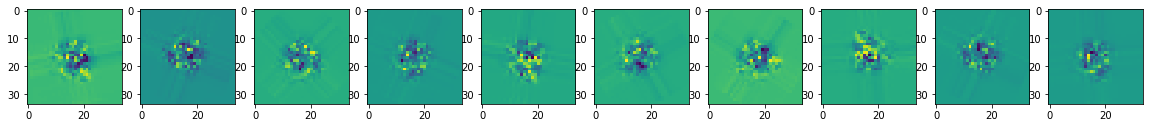

real


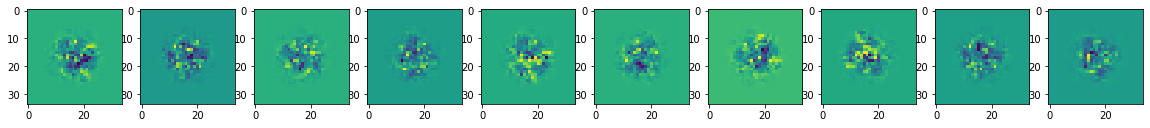

torch.mean(self.mu) tensor(0.0242)
torch.mean(self.BigSigma_I) tensor(0.0007)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0002)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0002)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1301.0753831863403 sec
sigma monotoring tensor(7.3998)
monotor sigma j max tensor(18.8493)
generated


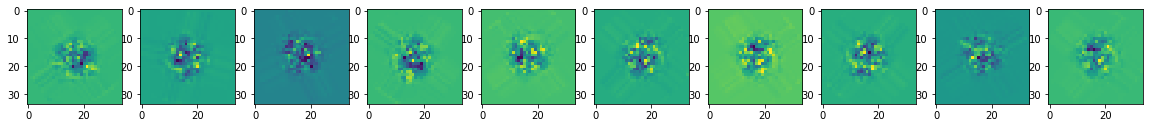

real


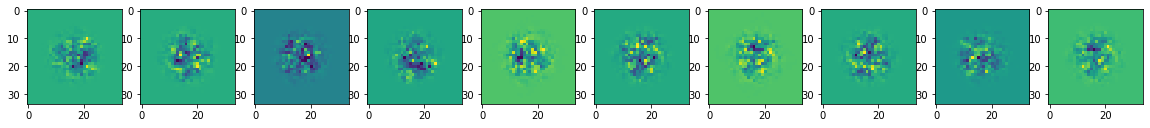

torch.mean(self.mu) tensor(0.0252)
torch.mean(self.BigSigma_I) tensor(0.0008)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0001)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1296.0471966266632 sec
sigma monotoring tensor(6.7220)
monotor sigma j max tensor(19.0951)
generated


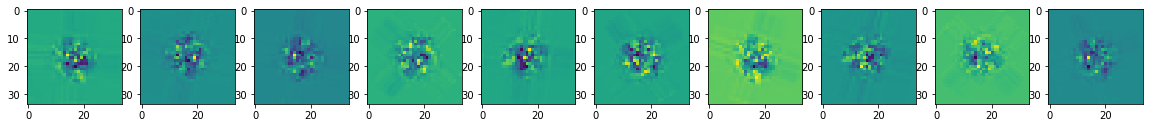

real


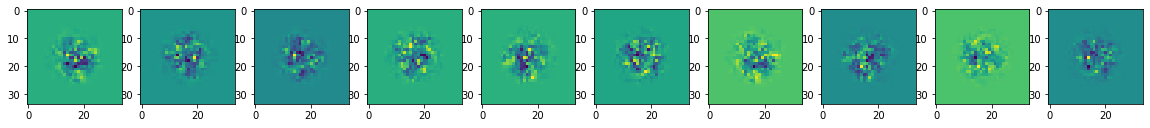

torch.mean(self.mu) tensor(0.0261)
torch.mean(self.BigSigma_I) tensor(0.0008)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0002)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1293.8759729862213 sec
sigma monotoring tensor(6.5272)
monotor sigma j max tensor(14.6204)
generated


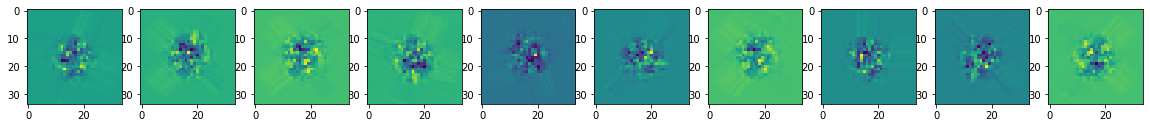

real


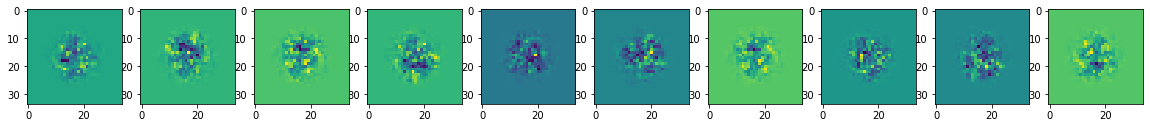

torch.mean(self.mu) tensor(0.0280)
torch.mean(self.BigSigma_I) tensor(0.0009)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1298.283350944519 sec
sigma monotoring tensor(5.9719)
monotor sigma j max tensor(16.0407)
generated


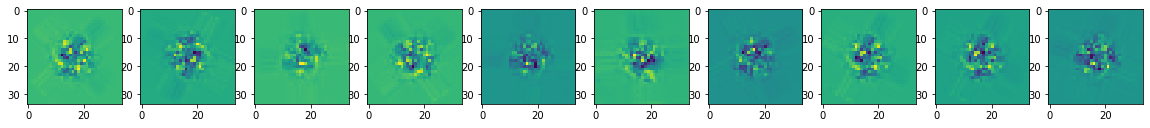

real


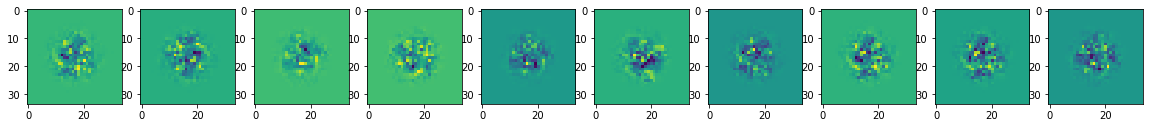

torch.mean(self.mu) tensor(0.0281)
torch.mean(self.BigSigma_I) tensor(0.0009)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1287.3704197406769 sec
sigma monotoring tensor(5.7728)
monotor sigma j max tensor(21.8036)
generated


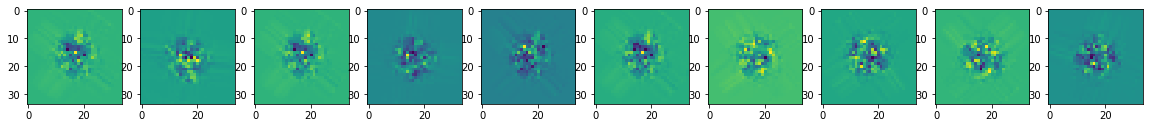

real


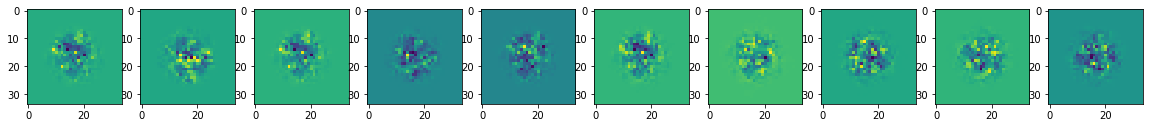

torch.mean(self.mu) tensor(0.0297)
torch.mean(self.BigSigma_I) tensor(0.0010)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1292.5432937145233 sec
sigma monotoring tensor(5.6340)
monotor sigma j max tensor(11.2318)
generated


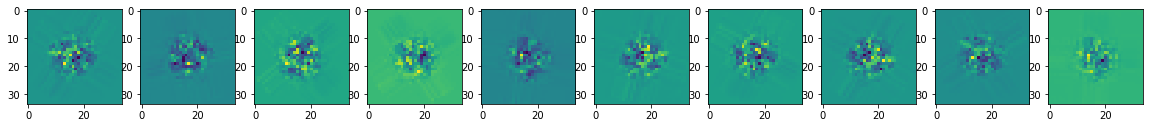

real


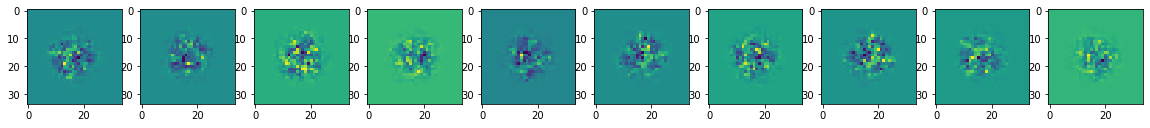

torch.mean(self.mu) tensor(0.0299)
torch.mean(self.BigSigma_I) tensor(0.0010)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0005)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1296.3571317195892 sec
sigma monotoring tensor(5.4238)
monotor sigma j max tensor(21.6968)
generated


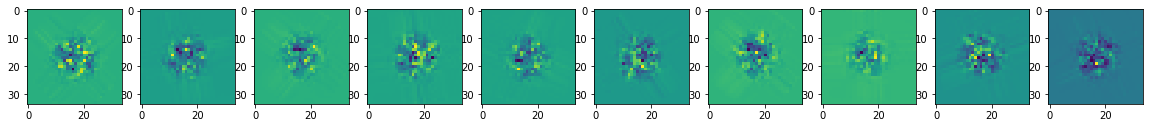

real


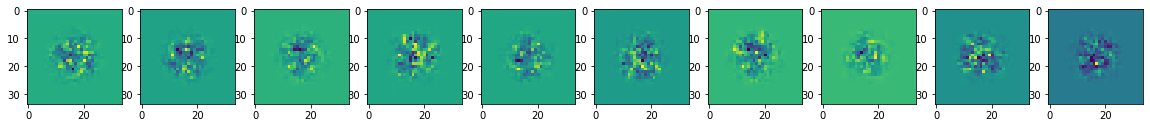

torch.mean(self.mu) tensor(0.0338)
torch.mean(self.BigSigma_I) tensor(0.0013)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1286.111496925354 sec
sigma monotoring tensor(5.2599)
monotor sigma j max tensor(16.3586)
generated


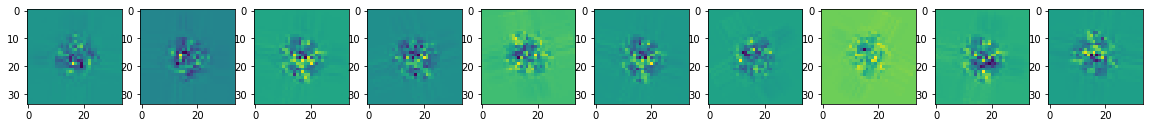

real


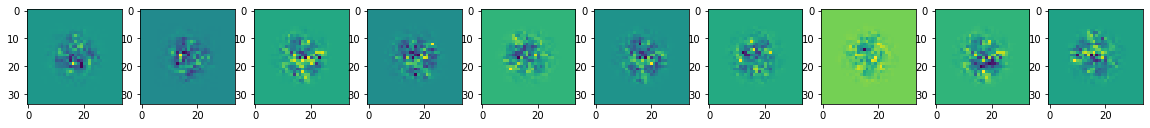

torch.mean(self.mu) tensor(0.0340)
torch.mean(self.BigSigma_I) tensor(0.0013)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0005)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1296.4243428707123 sec
sigma monotoring tensor(5.4715)
monotor sigma j max tensor(12.4649)
generated


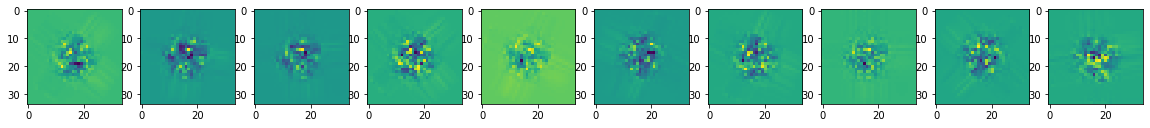

real


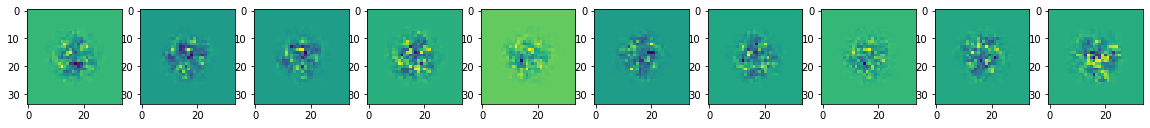

torch.mean(self.mu) tensor(0.0384)
torch.mean(self.BigSigma_I) tensor(0.0016)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1287.1318085193634 sec
sigma monotoring tensor(5.2199)
monotor sigma j max tensor(12.6783)
generated


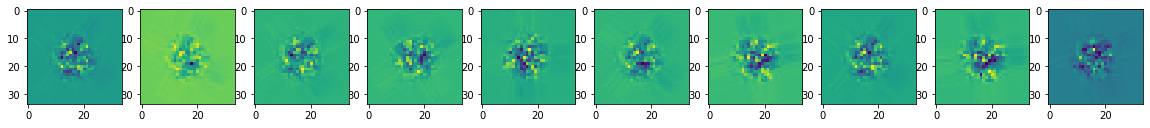

real


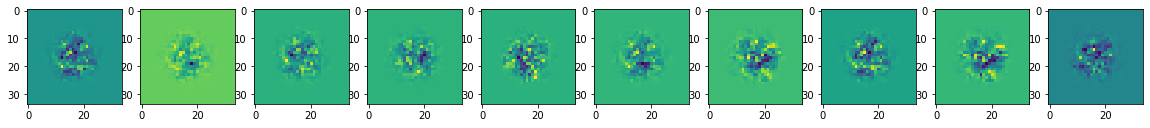

torch.mean(self.mu) tensor(0.0394)
torch.mean(self.BigSigma_I) tensor(0.0017)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0005)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1289.1337778568268 sec
sigma monotoring tensor(4.6733)
monotor sigma j max tensor(15.4143)
generated


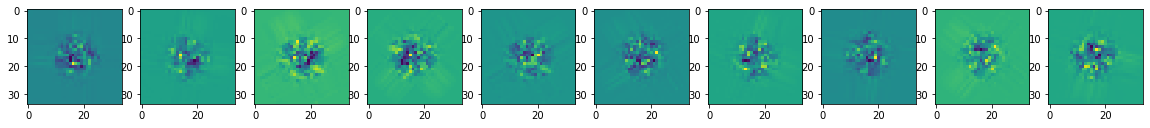

real


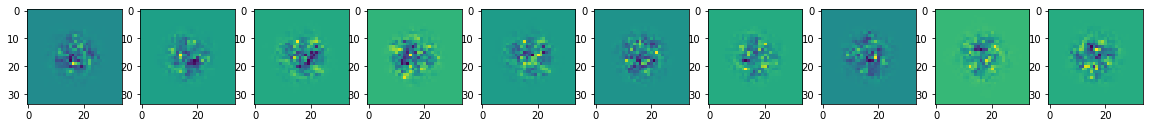

torch.mean(self.mu) tensor(0.0350)
torch.mean(self.BigSigma_I) tensor(0.0014)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1293.5533509254456 sec
sigma monotoring tensor(4.5979)
monotor sigma j max tensor(13.7320)
generated


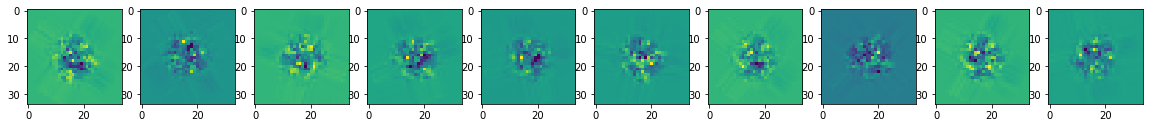

real


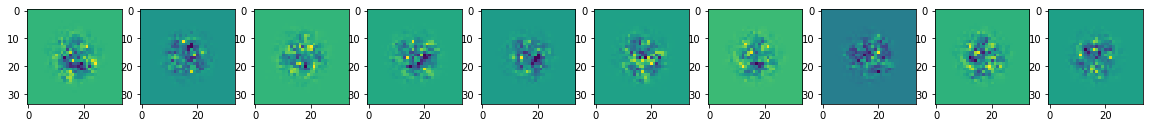

torch.mean(self.mu) tensor(0.0370)
torch.mean(self.BigSigma_I) tensor(0.0015)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0005)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1287.1162033081055 sec
sigma monotoring tensor(5.3922)
monotor sigma j max tensor(11.5214)
generated


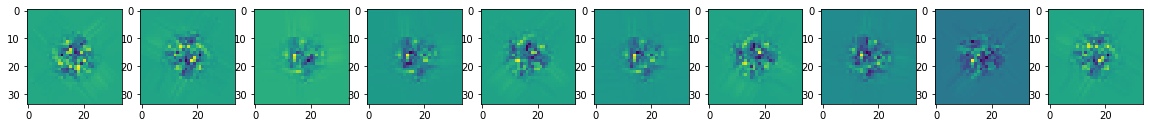

real


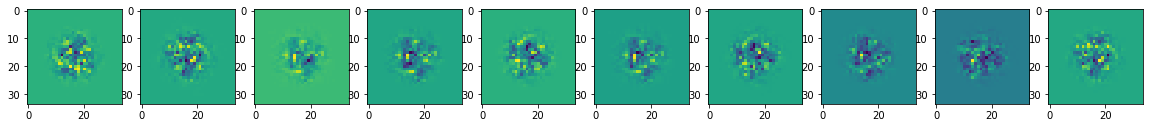

torch.mean(self.mu) tensor(0.0455)
torch.mean(self.BigSigma_I) tensor(0.0022)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1290.746634721756 sec
sigma monotoring tensor(5.5755)
monotor sigma j max tensor(11.6514)
generated


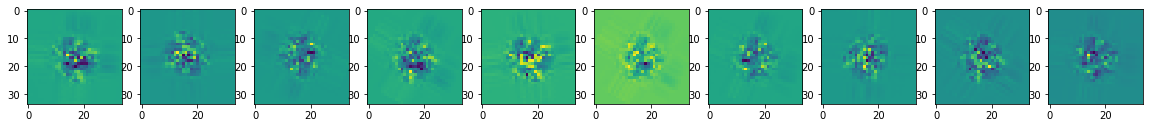

real


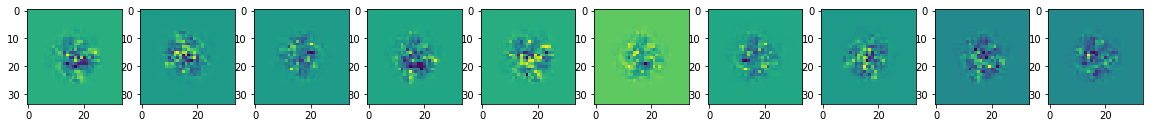

torch.mean(self.mu) tensor(0.0412)
torch.mean(self.BigSigma_I) tensor(0.0019)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1290.132987499237 sec
sigma monotoring tensor(4.4888)
monotor sigma j max tensor(8.8929)
generated


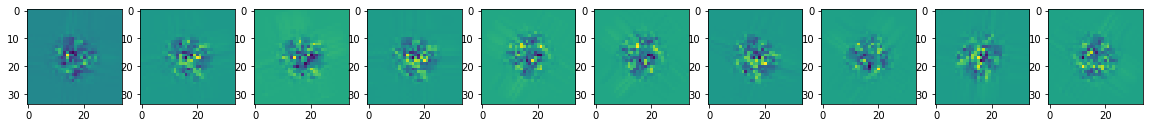

real


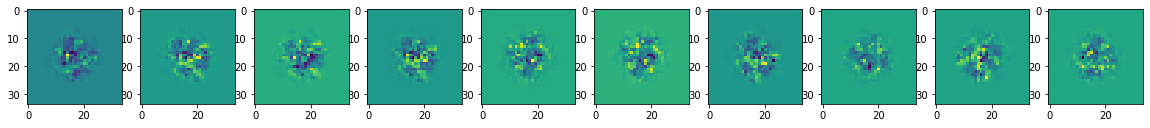

torch.mean(self.mu) tensor(0.0417)
torch.mean(self.BigSigma_I) tensor(0.0019)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1294.7680044174194 sec
sigma monotoring tensor(6.0458)
monotor sigma j max tensor(11.9746)
generated


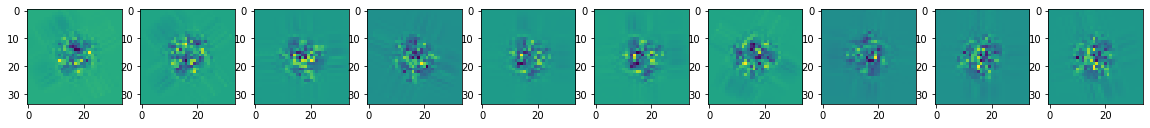

real


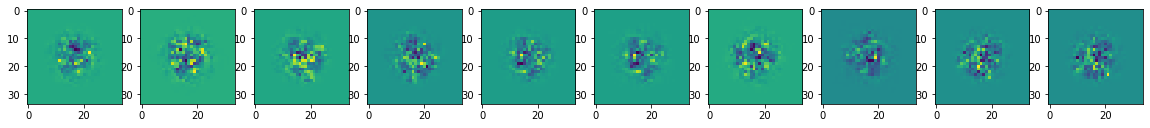

torch.mean(self.mu) tensor(0.0467)
torch.mean(self.BigSigma_I) tensor(0.0024)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1290.9562981128693 sec
sigma monotoring tensor(5.8436)
monotor sigma j max tensor(11.1194)
generated


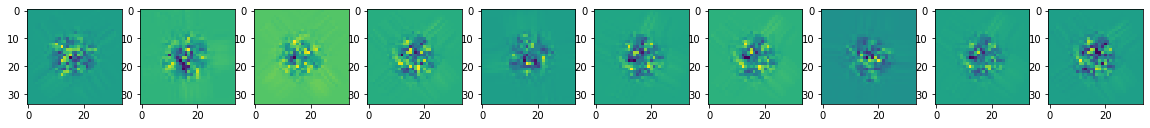

real


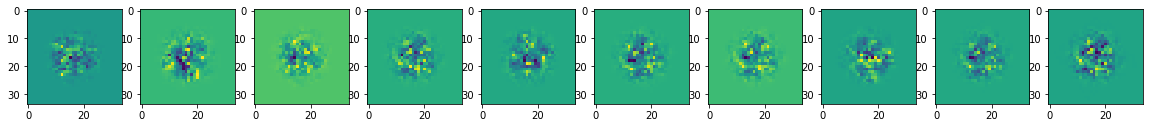

torch.mean(self.mu) tensor(0.0444)
torch.mean(self.BigSigma_I) tensor(0.0022)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1297.386928319931 sec
sigma monotoring tensor(5.2300)
monotor sigma j max tensor(8.3583)
generated


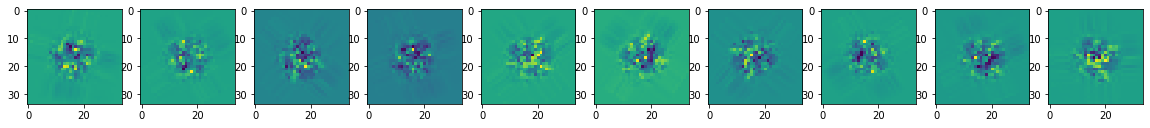

real


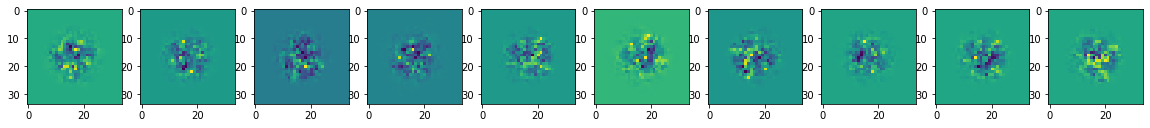

torch.mean(self.mu) tensor(0.0453)
torch.mean(self.BigSigma_I) tensor(0.0022)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0005)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1284.9936366081238 sec
sigma monotoring tensor(4.1422)
monotor sigma j max tensor(9.0277)
generated


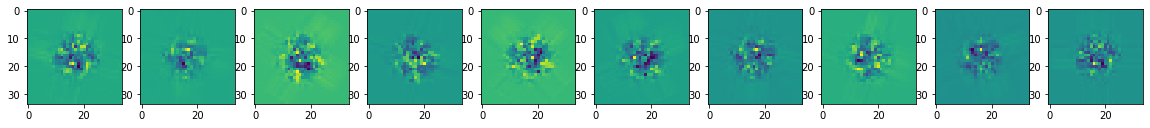

real


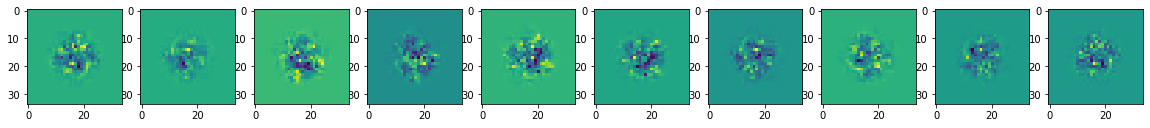

torch.mean(self.mu) tensor(0.0431)
torch.mean(self.BigSigma_I) tensor(0.0020)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1295.8068244457245 sec
sigma monotoring tensor(9.1983)
monotor sigma j max tensor(14.0442)
generated


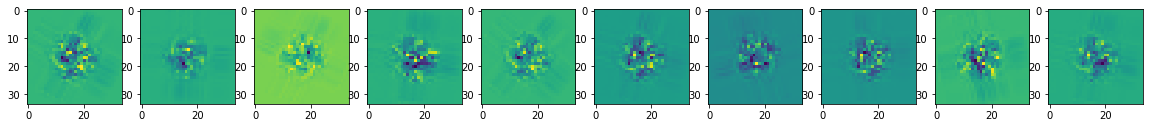

real


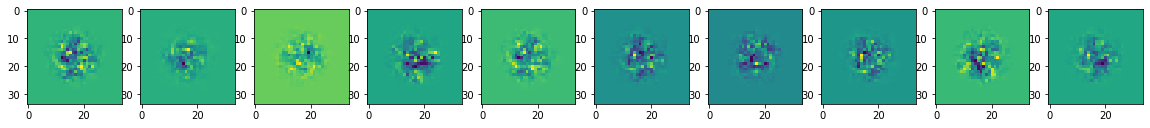

torch.mean(self.mu) tensor(0.0567)
torch.mean(self.BigSigma_I) tensor(0.0034)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0001)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1295.9819641113281 sec
sigma monotoring tensor(5.3345)
monotor sigma j max tensor(8.3858)
generated


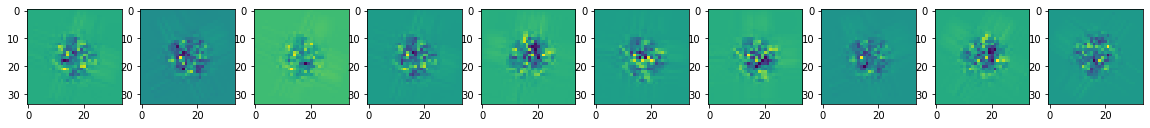

real


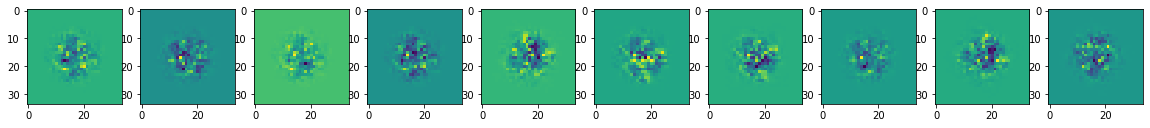

torch.mean(self.mu) tensor(0.0497)
torch.mean(self.BigSigma_I) tensor(0.0027)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1292.3088564872742 sec
sigma monotoring tensor(4.4345)
monotor sigma j max tensor(8.3926)
generated


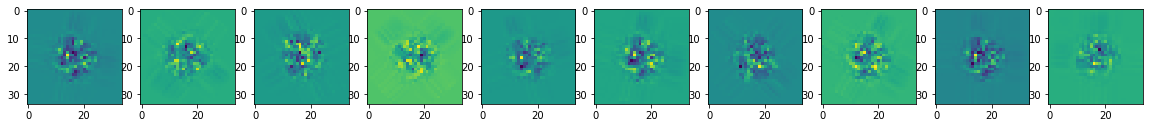

real


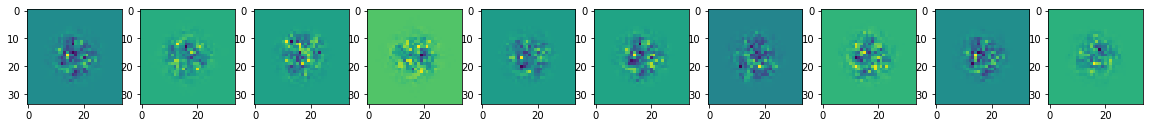

torch.mean(self.mu) tensor(0.0470)
torch.mean(self.BigSigma_I) tensor(0.0024)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0005)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1299.6029155254364 sec
sigma monotoring tensor(5.2083)
monotor sigma j max tensor(9.2614)
generated


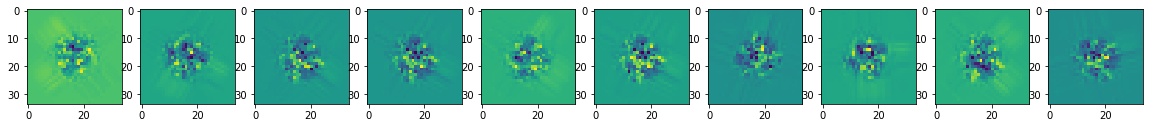

real


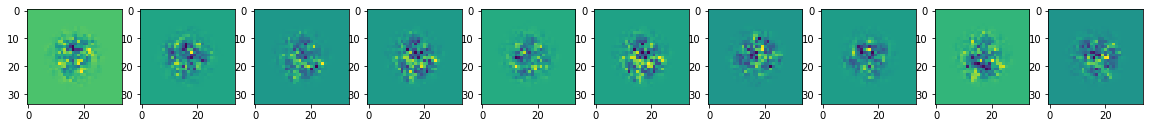

torch.mean(self.mu) tensor(0.0534)
torch.mean(self.BigSigma_I) tensor(0.0030)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1292.8382008075714 sec
sigma monotoring tensor(5.5384)
monotor sigma j max tensor(8.9371)
generated


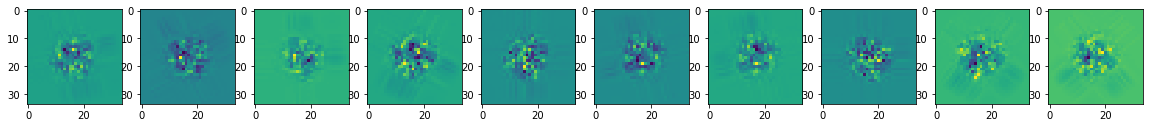

real


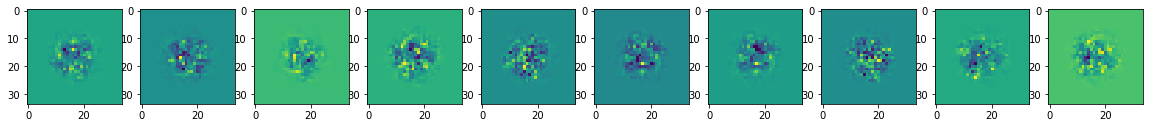

torch.mean(self.mu) tensor(0.0534)
torch.mean(self.BigSigma_I) tensor(0.0030)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1288.7316994667053 sec
sigma monotoring tensor(4.0515)
monotor sigma j max tensor(10.9411)
generated


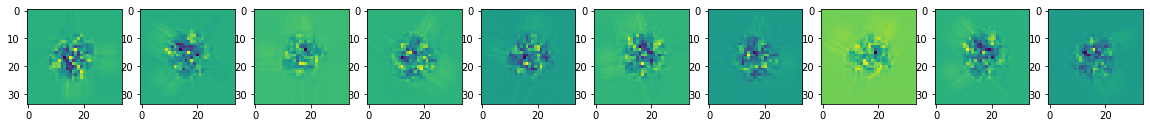

real


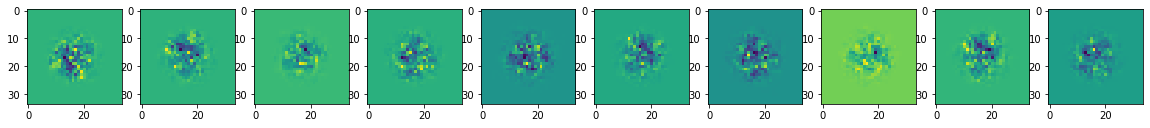

torch.mean(self.mu) tensor(0.0546)
torch.mean(self.BigSigma_I) tensor(0.0032)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0006)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1286.798618555069 sec
sigma monotoring tensor(5.0213)
monotor sigma j max tensor(8.9342)
generated


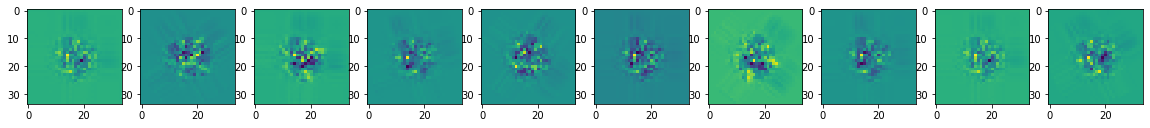

real


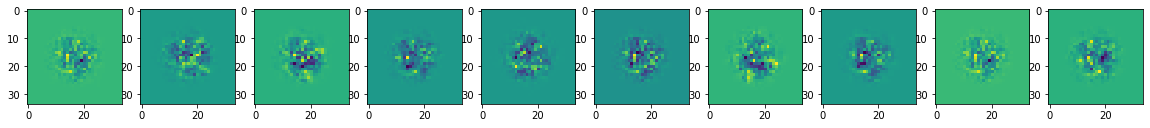

torch.mean(self.mu) tensor(0.0524)
torch.mean(self.BigSigma_I) tensor(0.0029)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0006)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1283.8894193172455 sec
sigma monotoring tensor(4.8466)
monotor sigma j max tensor(9.7860)
generated


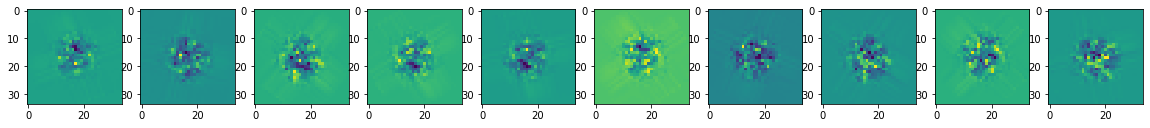

real


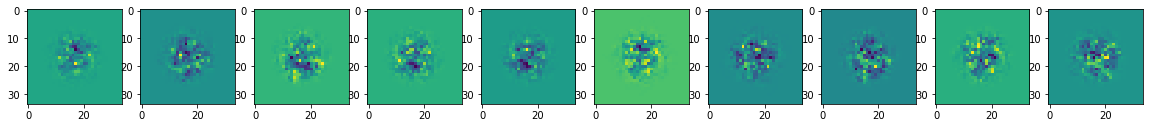

torch.mean(self.mu) tensor(0.0487)
torch.mean(self.BigSigma_I) tensor(0.0025)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1292.9622700214386 sec
sigma monotoring tensor(5.7342)
monotor sigma j max tensor(13.6714)
generated


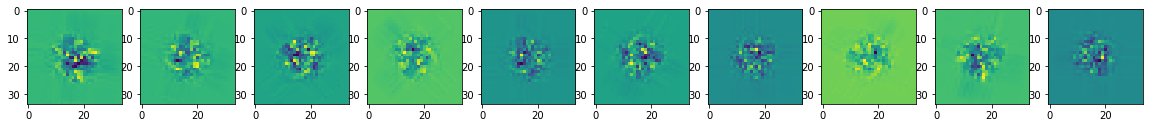

real


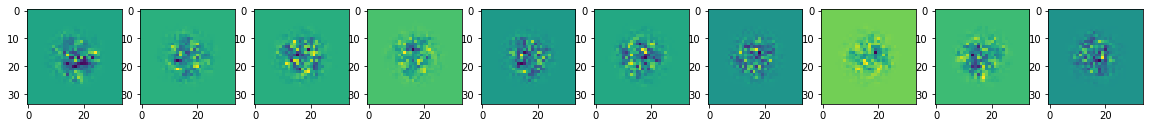

torch.mean(self.mu) tensor(0.0521)
torch.mean(self.BigSigma_I) tensor(0.0029)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1282.8398604393005 sec
sigma monotoring tensor(6.3458)
monotor sigma j max tensor(11.3671)
generated


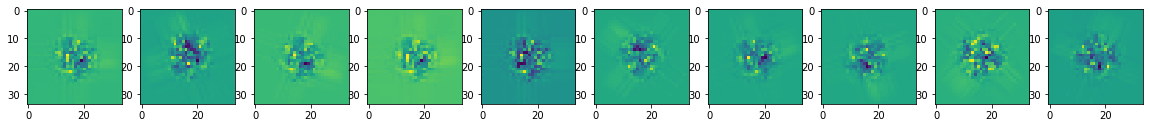

real


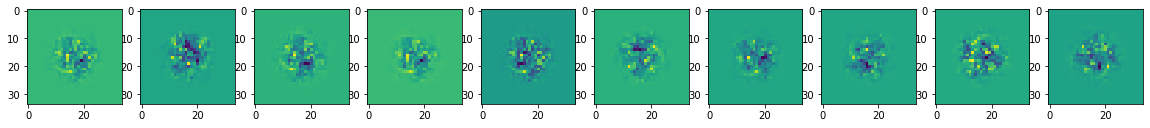

torch.mean(self.mu) tensor(0.0535)
torch.mean(self.BigSigma_I) tensor(0.0030)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1279.8516414165497 sec
sigma monotoring tensor(3.3821)
monotor sigma j max tensor(7.7827)
generated


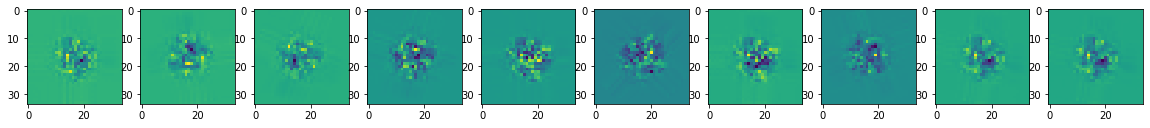

real


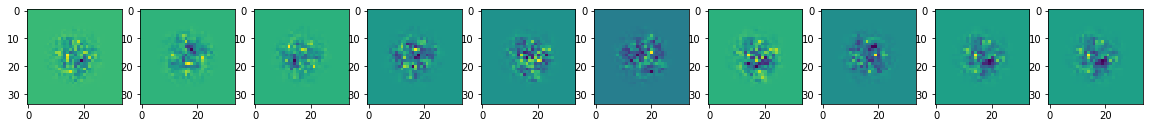

torch.mean(self.mu) tensor(0.0506)
torch.mean(self.BigSigma_I) tensor(0.0027)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0007)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1295.3068113327026 sec
sigma monotoring tensor(3.6103)
monotor sigma j max tensor(5.1728)
generated


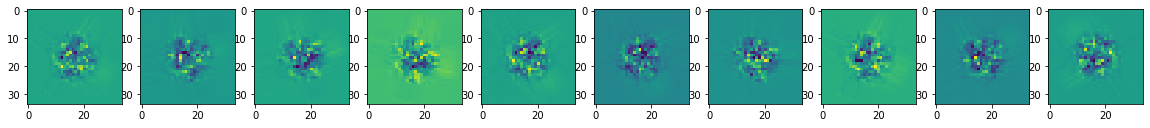

real


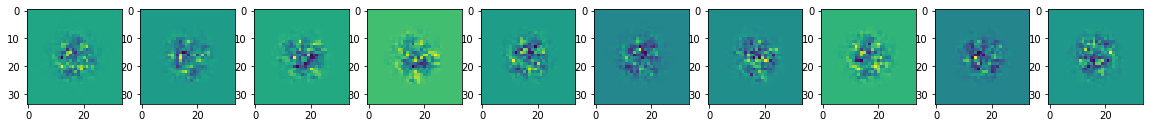

torch.mean(self.mu) tensor(0.0556)
torch.mean(self.BigSigma_I) tensor(0.0033)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0006)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1293.2381002902985 sec
sigma monotoring tensor(5.0536)
monotor sigma j max tensor(10.2853)
generated


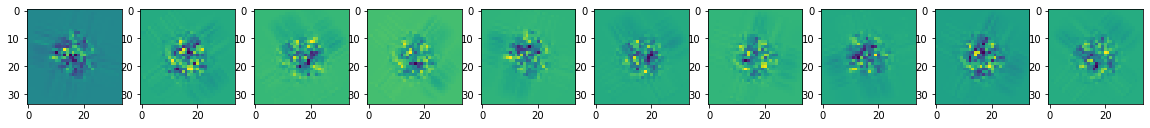

real


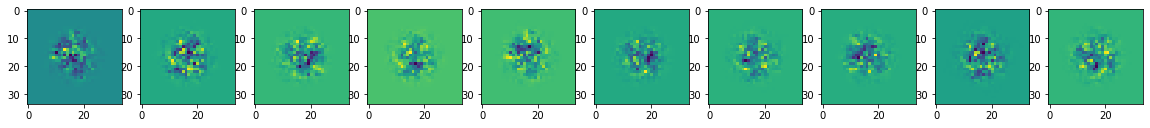

torch.mean(self.mu) tensor(0.0575)
torch.mean(self.BigSigma_I) tensor(0.0035)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0005)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1291.2710571289062 sec
sigma monotoring tensor(7.7788)
monotor sigma j max tensor(21.8926)
generated


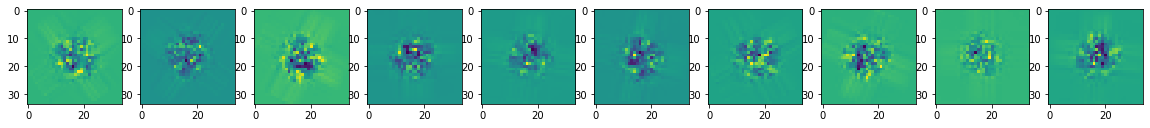

real


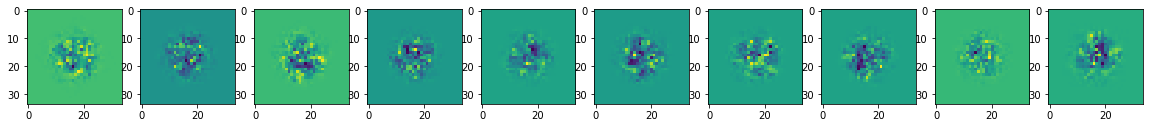

torch.mean(self.mu) tensor(0.0476)
torch.mean(self.BigSigma_I) tensor(0.0024)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0002)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1305.4861550331116 sec
sigma monotoring tensor(3.1105)
monotor sigma j max tensor(7.1514)
generated


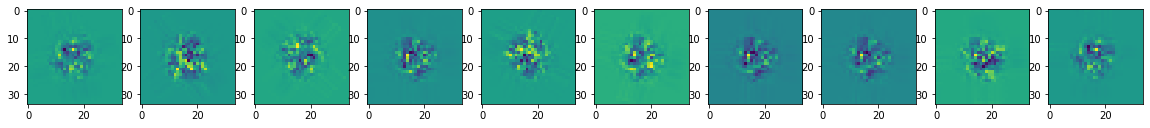

real


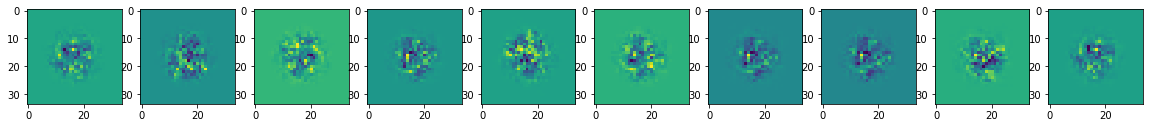

torch.mean(self.mu) tensor(0.0500)
torch.mean(self.BigSigma_I) tensor(0.0026)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0006)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1283.4615185260773 sec
sigma monotoring tensor(134.3365)
monotor sigma j max tensor(274.4533)
generated


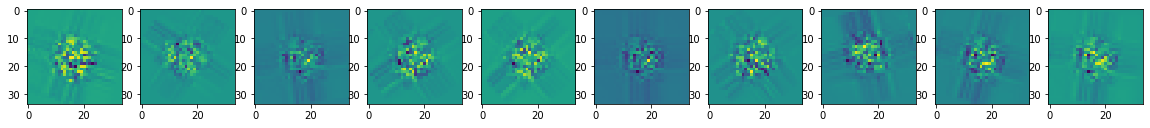

real


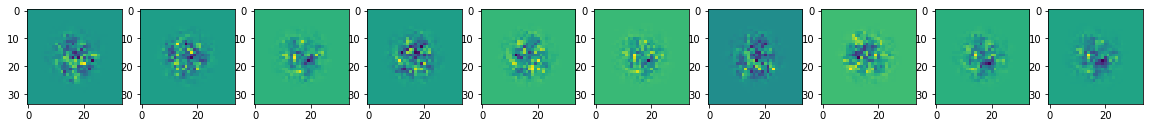

torch.mean(self.mu) tensor(-0.0298)
torch.mean(self.BigSigma_I) tensor(0.0023)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(8.8702e-07)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1296.8342351913452 sec
sigma monotoring tensor(54.7648)
monotor sigma j max tensor(91.9709)
generated


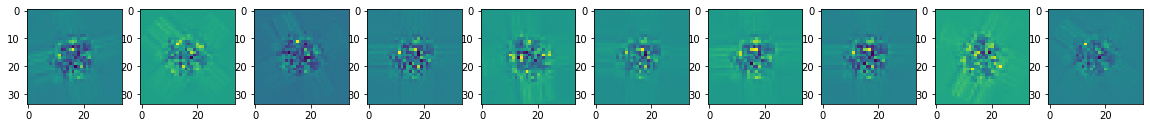

real


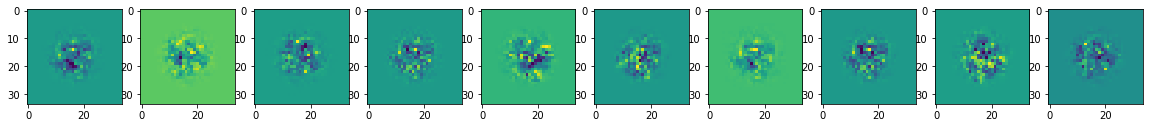

torch.mean(self.mu) tensor(-0.0548)
torch.mean(self.BigSigma_I) tensor(0.0035)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(7.9733e-06)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1296.6797363758087 sec
sigma monotoring tensor(206.9261)
monotor sigma j max tensor(385.8385)
generated


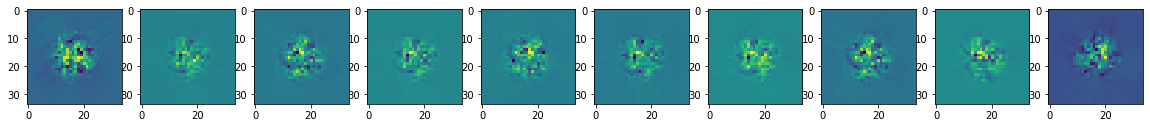

real


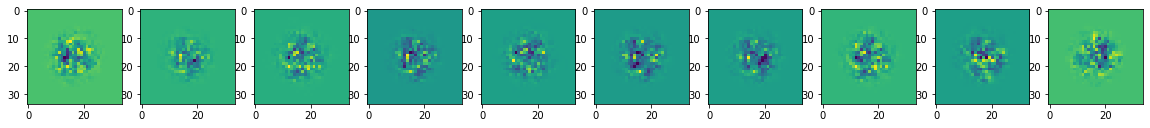

torch.mean(self.mu) tensor(0.0300)
torch.mean(self.BigSigma_I) tensor(0.0027)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(3.4396e-07)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1287.8710050582886 sec
sigma monotoring tensor(87.5264)
monotor sigma j max tensor(184.9396)
generated


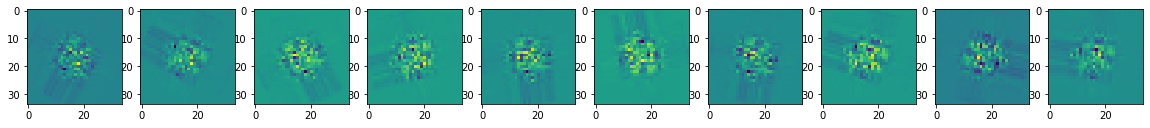

real


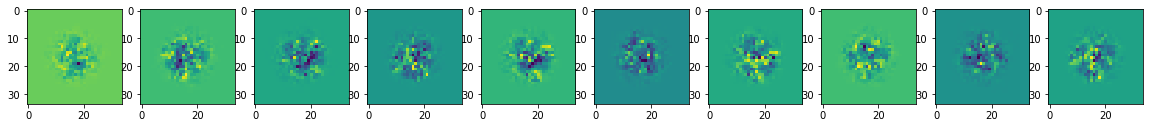

torch.mean(self.mu) tensor(-0.0489)
torch.mean(self.BigSigma_I) tensor(0.0039)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(1.5536e-06)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1300.9770722389221 sec
sigma monotoring tensor(171.7764)
monotor sigma j max tensor(481.1193)
generated


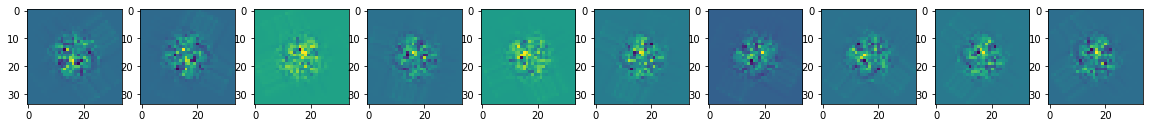

real


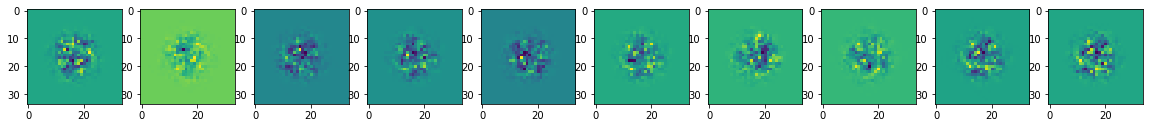

torch.mean(self.mu) tensor(0.0388)
torch.mean(self.BigSigma_I) tensor(0.0033)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(3.6309e-07)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1307.1805691719055 sec
sigma monotoring tensor(81.1536)
monotor sigma j max tensor(165.1647)
generated


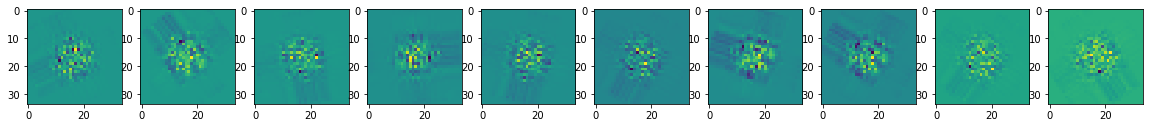

real


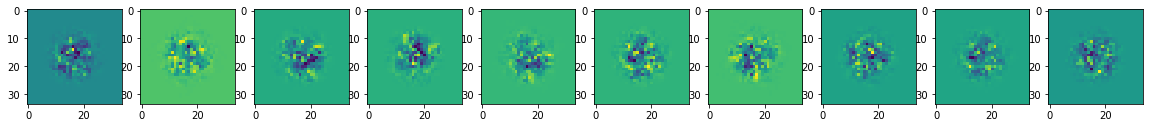

torch.mean(self.mu) tensor(-0.0492)
torch.mean(self.BigSigma_I) tensor(0.0047)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(1.0820e-06)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1297.8383586406708 sec
sigma monotoring tensor(168.7921)
monotor sigma j max tensor(351.9846)
generated


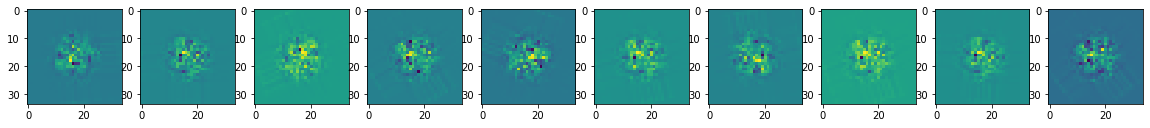

real


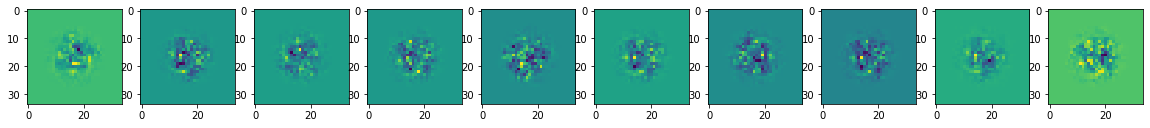

torch.mean(self.mu) tensor(0.0426)
torch.mean(self.BigSigma_I) tensor(0.0038)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(3.0735e-07)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1293.3009581565857 sec
sigma monotoring tensor(62.1789)
monotor sigma j max tensor(126.9868)
generated


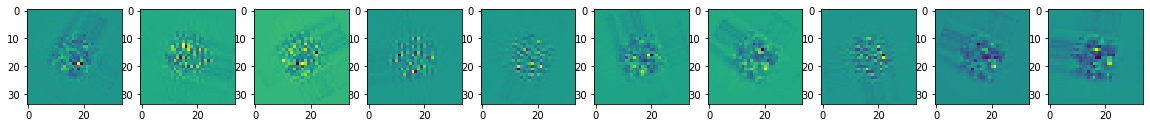

real


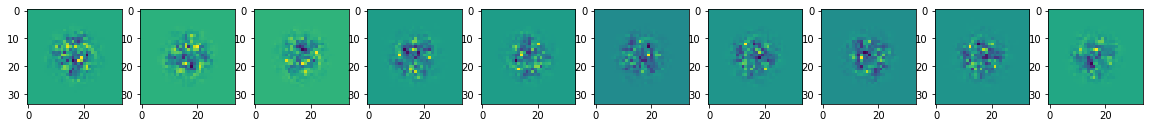

torch.mean(self.mu) tensor(0.0040)
torch.mean(self.BigSigma_I) tensor(0.0032)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(3.3166e-07)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1307.7064027786255 sec
sigma monotoring tensor(66.4873)
monotor sigma j max tensor(144.8653)
generated


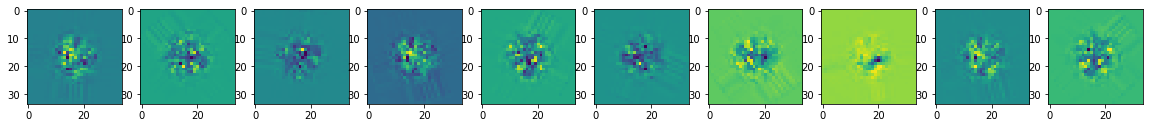

real


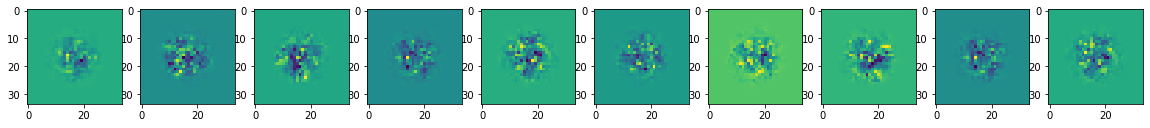

torch.mean(self.mu) tensor(0.0732)
torch.mean(self.BigSigma_I) tensor(0.0075)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(3.6089e-06)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1291.290996313095 sec
sigma monotoring tensor(51.1690)
monotor sigma j max tensor(94.3816)
generated


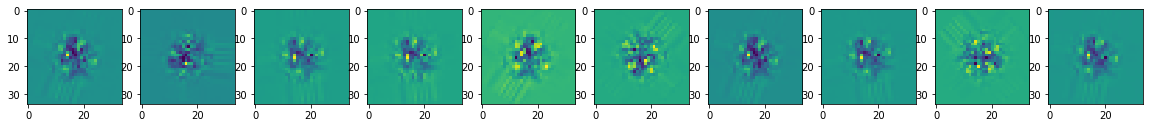

real


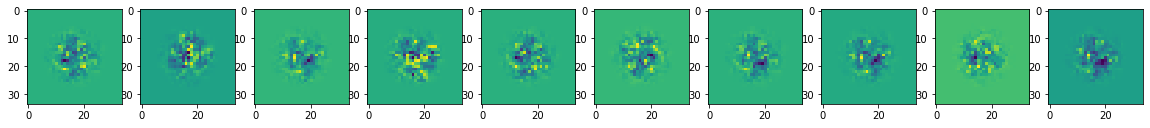

torch.mean(self.mu) tensor(0.0563)
torch.mean(self.BigSigma_I) tensor(0.0036)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(5.7023e-06)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1289.8310956954956 sec
sigma monotoring tensor(20.0493)
monotor sigma j max tensor(41.4747)
generated


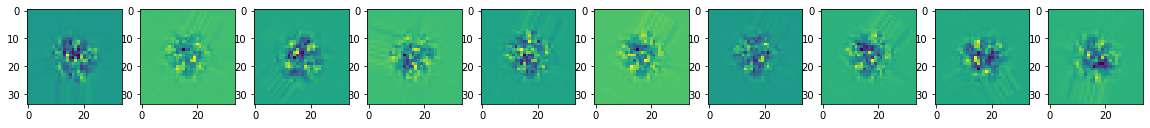

real


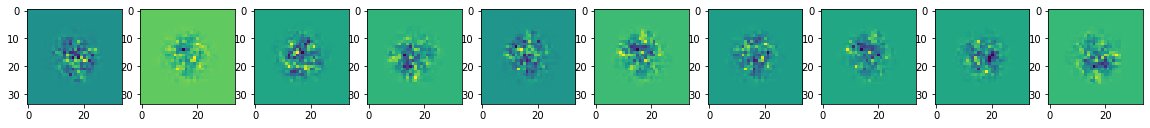

torch.mean(self.mu) tensor(0.0488)
torch.mean(self.BigSigma_I) tensor(0.0026)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(3.1749e-05)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1303.8971407413483 sec
sigma monotoring tensor(8.6753)
monotor sigma j max tensor(17.6858)
generated


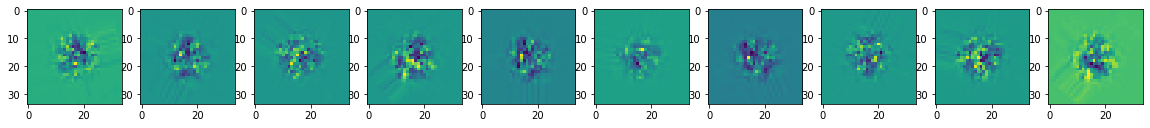

real


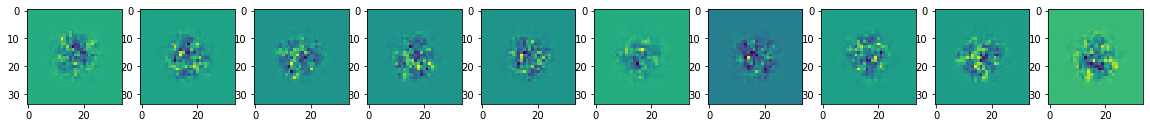

torch.mean(self.mu) tensor(0.0480)
torch.mean(self.BigSigma_I) tensor(0.0024)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0001)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1294.3969943523407 sec
sigma monotoring tensor(5.4901)
monotor sigma j max tensor(13.8655)
generated


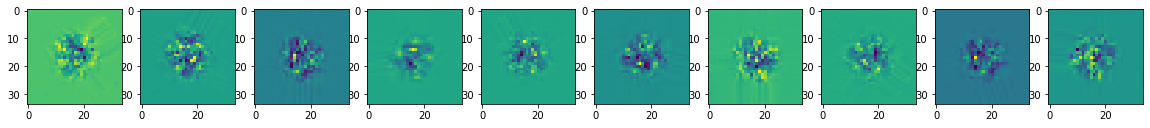

real


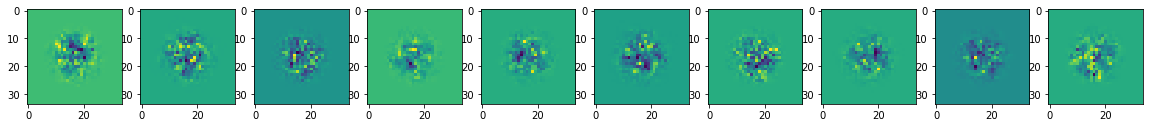

torch.mean(self.mu) tensor(0.0473)
torch.mean(self.BigSigma_I) tensor(0.0024)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1298.4028737545013 sec
sigma monotoring tensor(238.4026)
monotor sigma j max tensor(571.7368)
generated


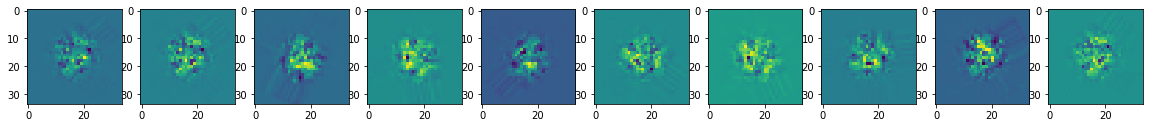

real


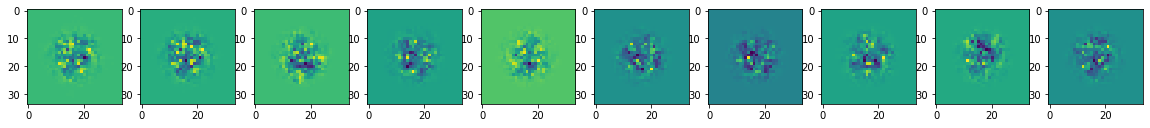

torch.mean(self.mu) tensor(-0.0215)
torch.mean(self.BigSigma_I) tensor(0.0018)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(4.2683e-07)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1281.8745720386505 sec
sigma monotoring tensor(58.4997)
monotor sigma j max tensor(102.5787)
generated


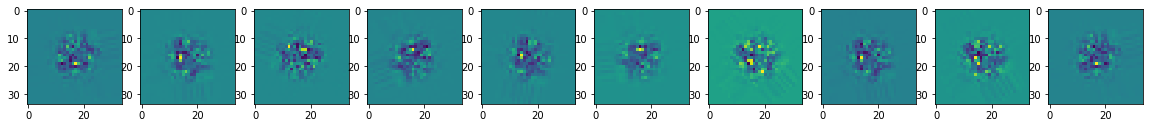

real


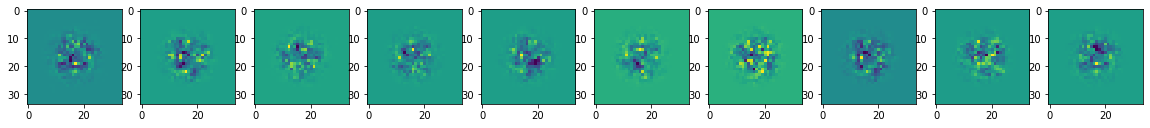

torch.mean(self.mu) tensor(-0.0516)
torch.mean(self.BigSigma_I) tensor(0.0031)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(3.3635e-06)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1287.9810192584991 sec
sigma monotoring tensor(20.1795)
monotor sigma j max tensor(39.3181)
generated


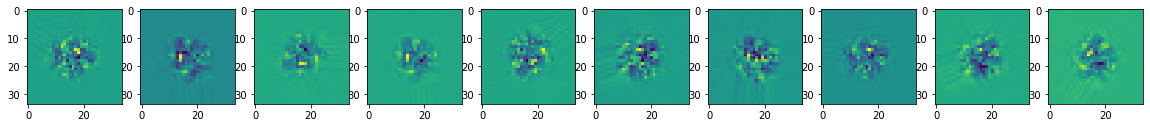

real


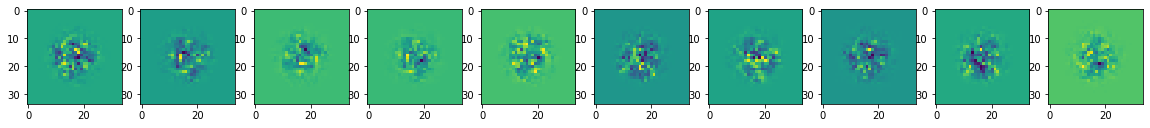

torch.mean(self.mu) tensor(-0.0513)
torch.mean(self.BigSigma_I) tensor(0.0028)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(2.9485e-05)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1301.9298071861267 sec
sigma monotoring tensor(8.4075)
monotor sigma j max tensor(16.4298)
generated


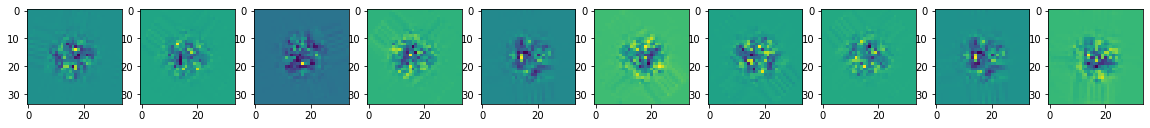

real


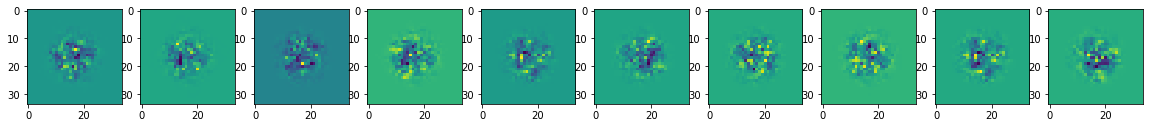

torch.mean(self.mu) tensor(-0.0535)
torch.mean(self.BigSigma_I) tensor(0.0030)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0001)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1289.0125255584717 sec
sigma monotoring tensor(5.6897)
monotor sigma j max tensor(14.3114)
generated


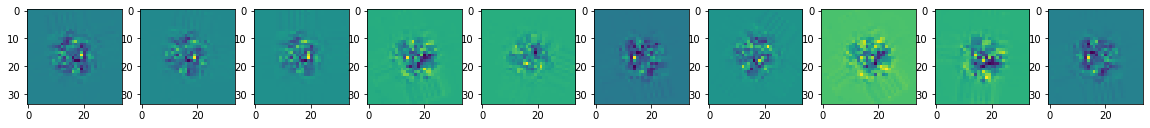

real


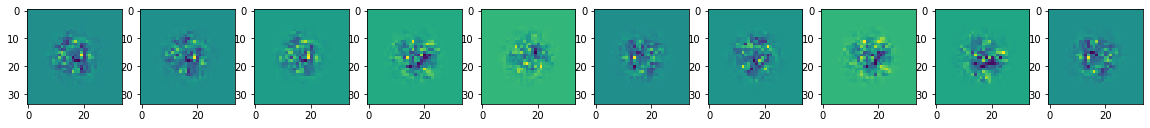

torch.mean(self.mu) tensor(-0.0545)
torch.mean(self.BigSigma_I) tensor(0.0031)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1289.5405707359314 sec
sigma monotoring tensor(4.9259)
monotor sigma j max tensor(11.3313)
generated


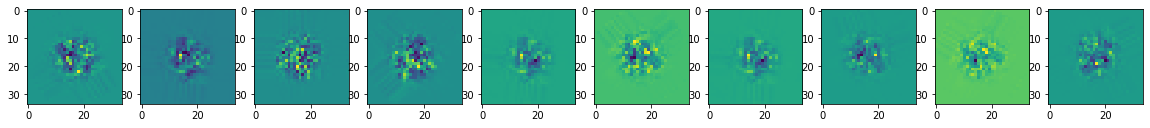

real


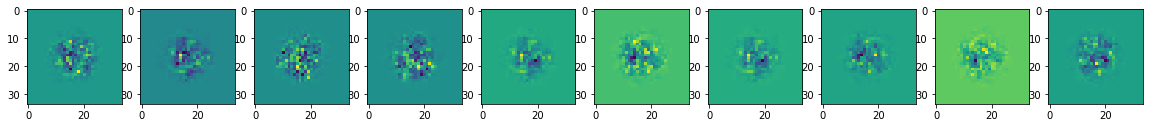

torch.mean(self.mu) tensor(-0.0579)
torch.mean(self.BigSigma_I) tensor(0.0035)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0003)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1302.4791836738586 sec
sigma monotoring tensor(4.4065)
monotor sigma j max tensor(8.3760)
generated


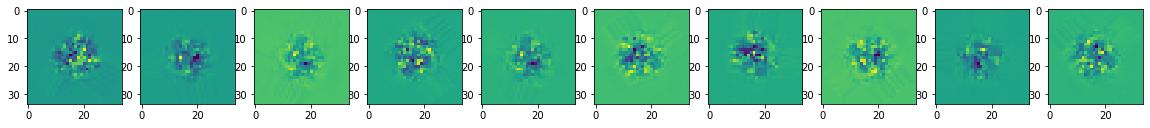

real


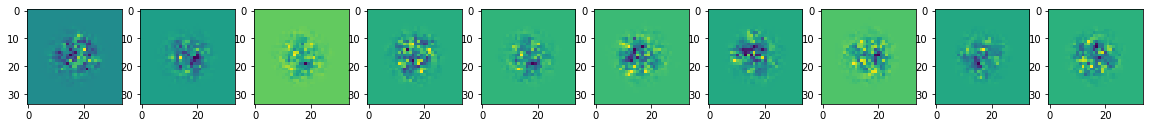

torch.mean(self.mu) tensor(-0.0621)
torch.mean(self.BigSigma_I) tensor(0.0040)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Sigma_Z_inv  tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
torch.mean(torch.abs(self.U1.grad)) tensor(0.0004)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)
1306.703868150711 sec
sigma monotoring tensor(7.6112)
monotor sigma j max tensor(18.3931)
generated


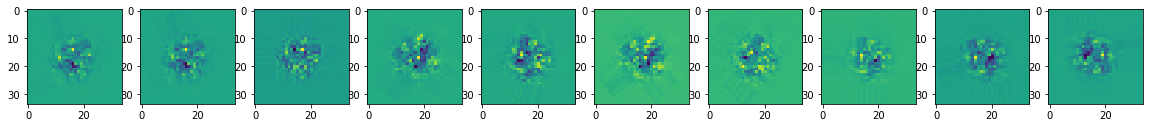

real


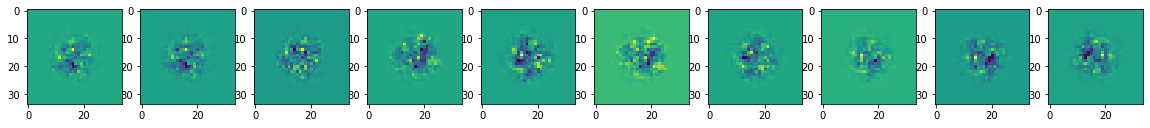

torch.mean(self.mu) tensor(-0.0789)
torch.mean(self.BigSigma_I) tensor(0.0064)
self.Q torch.Size([]) tensor(inf, grad_fn=<DivBackward0>)


In [ ]:
MP3.fit(start_ratio = 0.1)


In [ ]:
#increase batch_size, decrease learning rate
#first load 15 trained component from n = 15 set
"""
U1 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
U2 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
U3 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
MP3.U1.data = U1.detach()
MP3.U2.data = U2.detach()
MP3.U3.data = U3.detach()

"""




#MP3.fit(start_ratio = 0.1)



generated


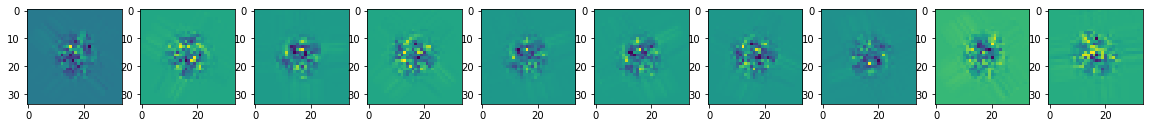

real


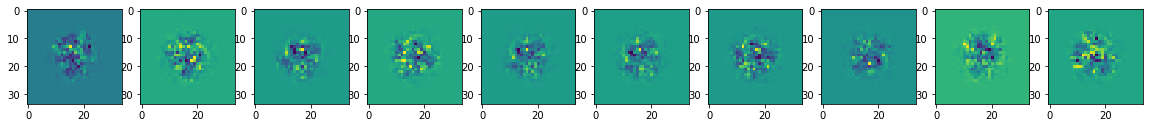

generated


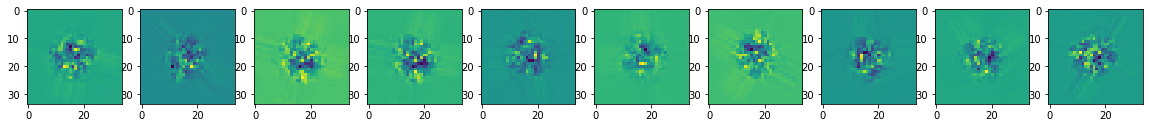

real


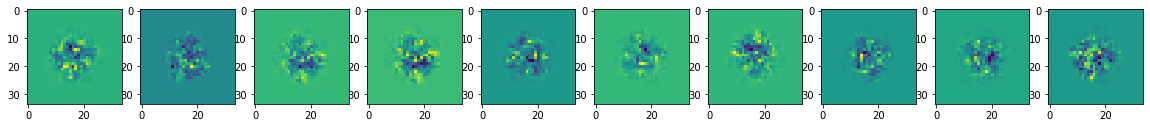

generated


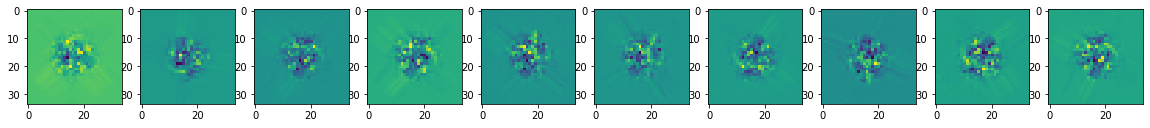

real


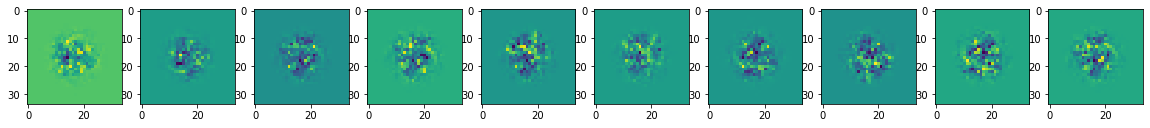

generated


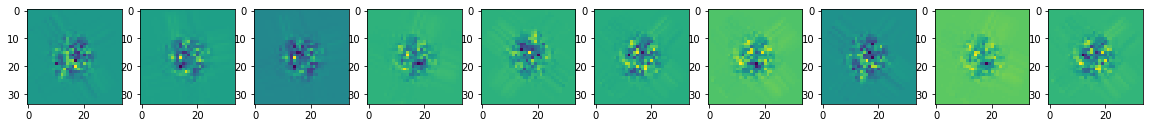

real


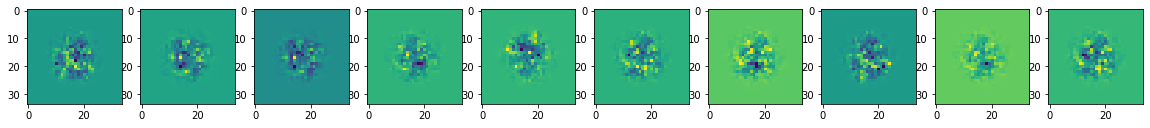

generated


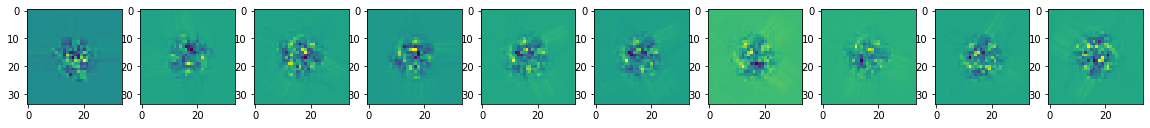

real


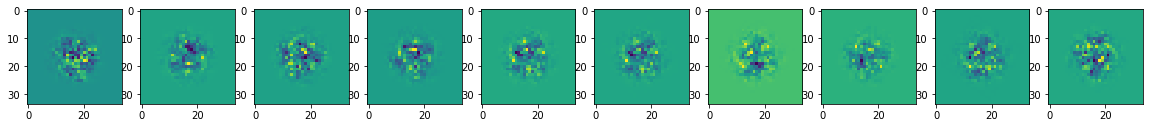

generated


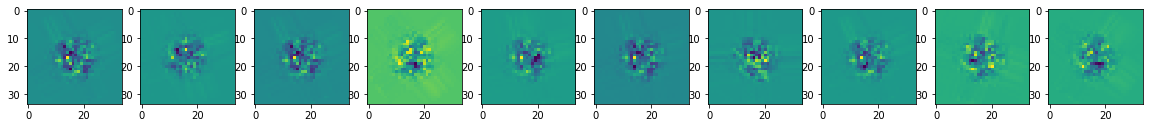

real


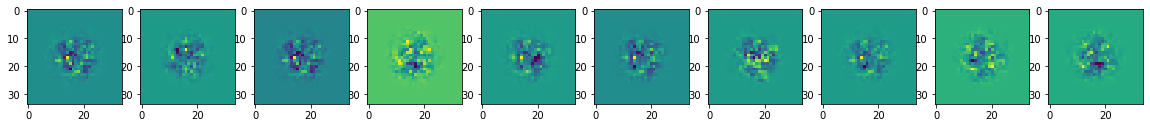

generated


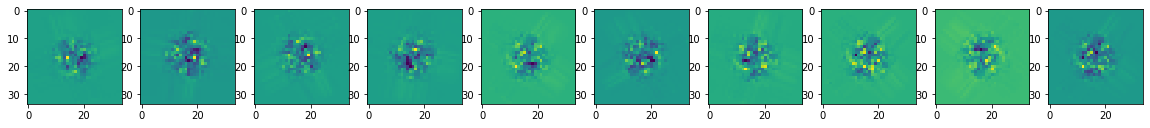

real


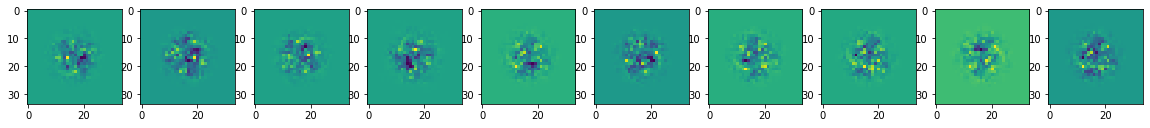

generated


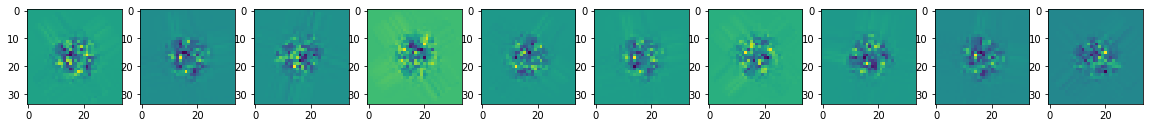

real


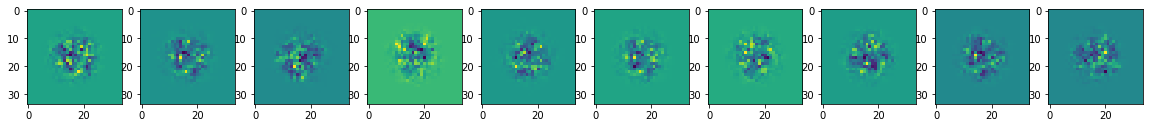

generated


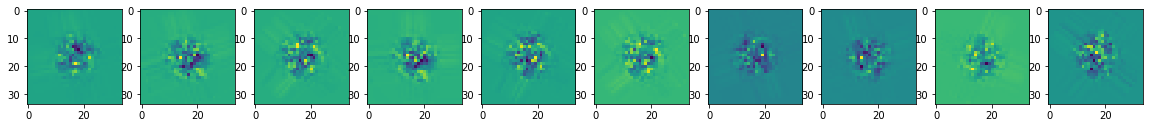

real


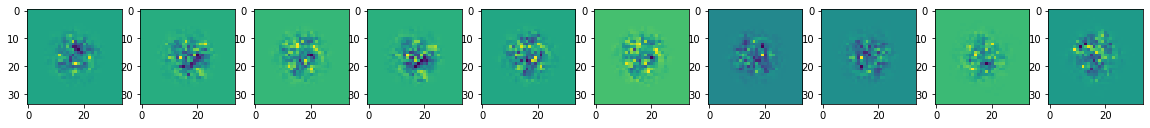

generated


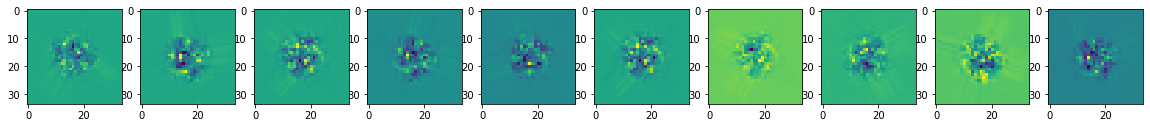

real


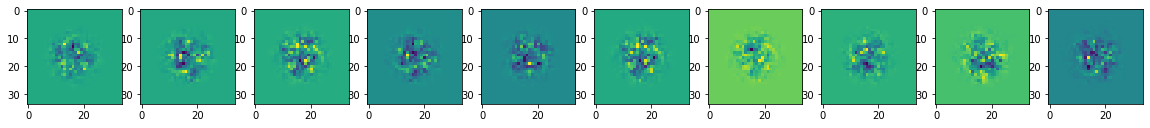

generated


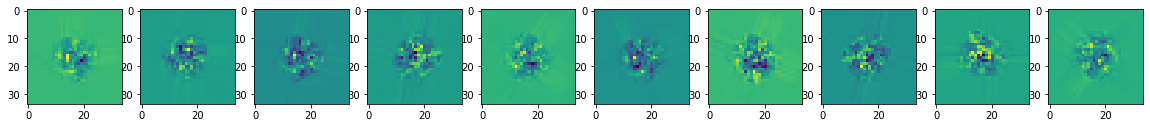

real


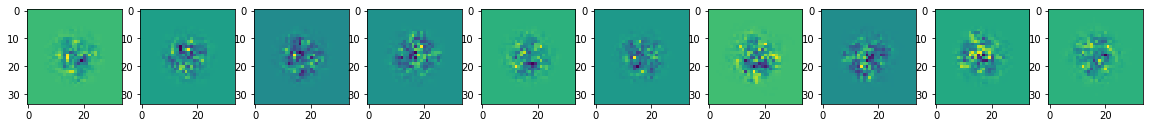

generated


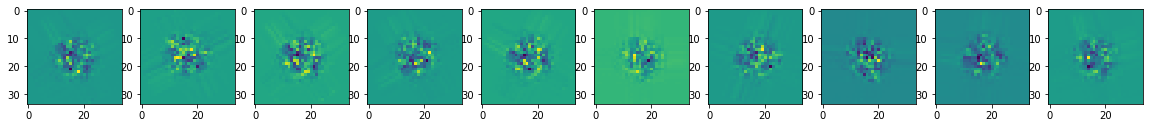

real


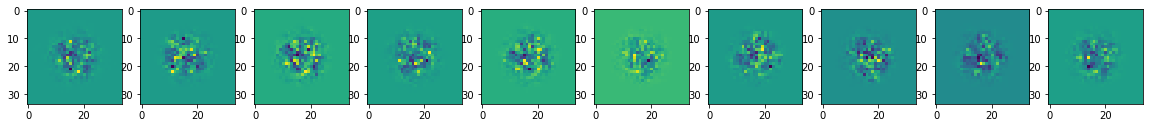

generated


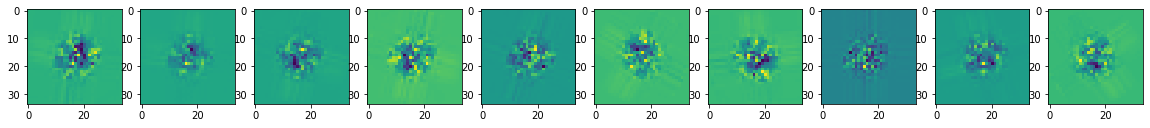

real


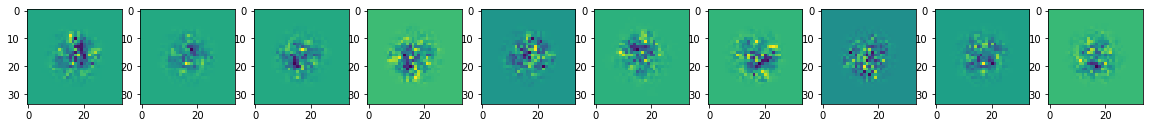

generated


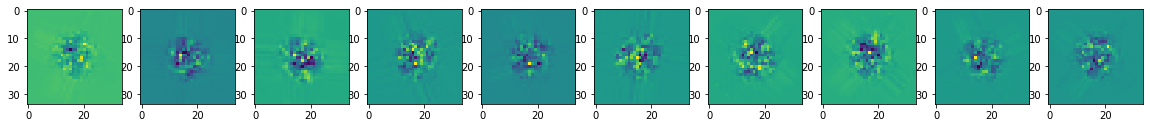

real


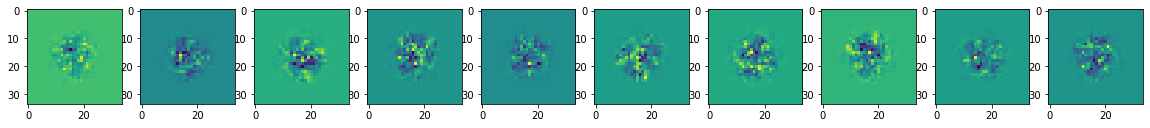

generated


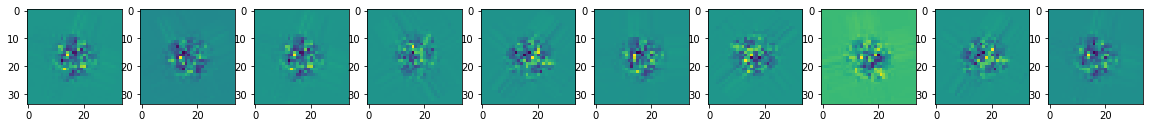

real


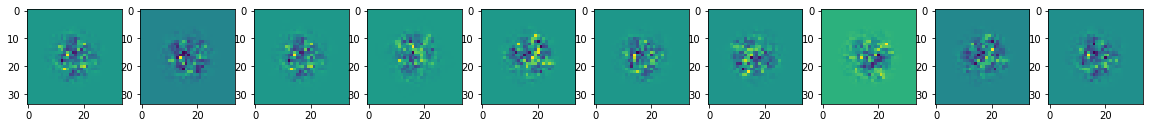

generated


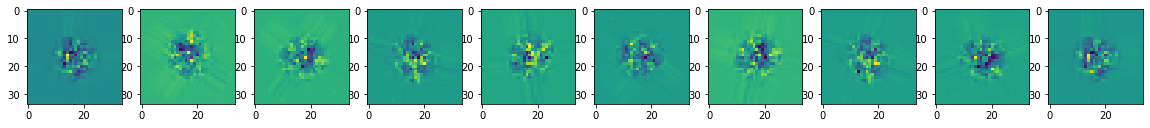

real


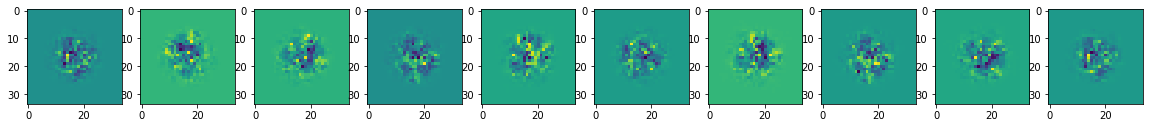

generated


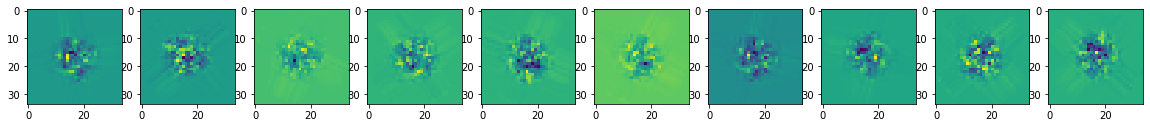

real


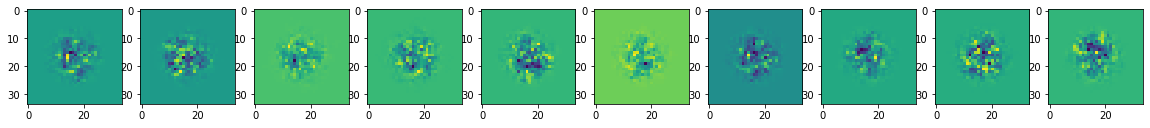

generated


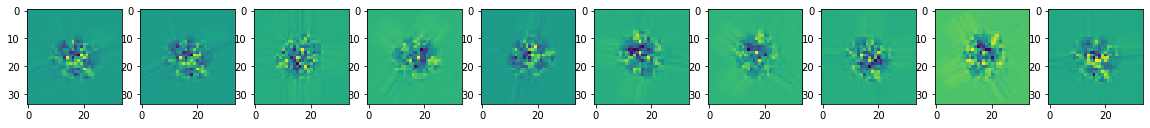

real


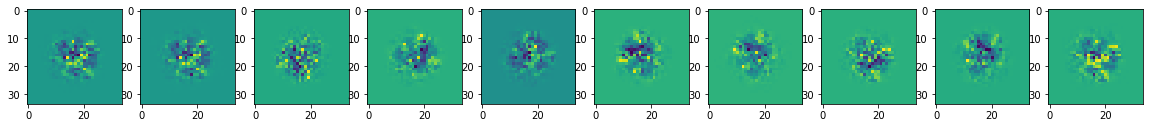

generated


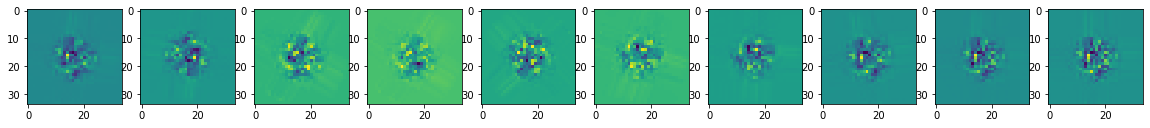

real


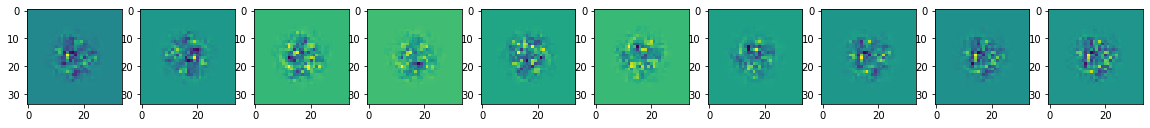

generated


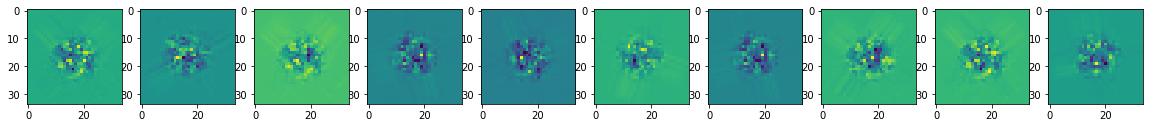

real


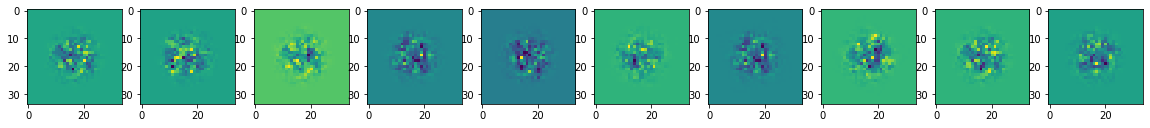

generated


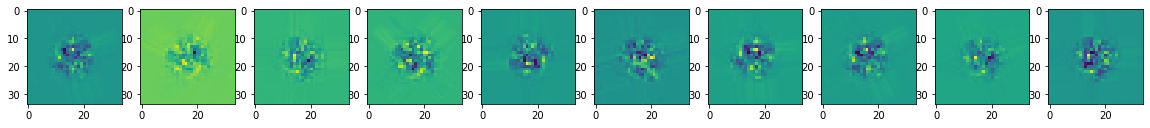

real


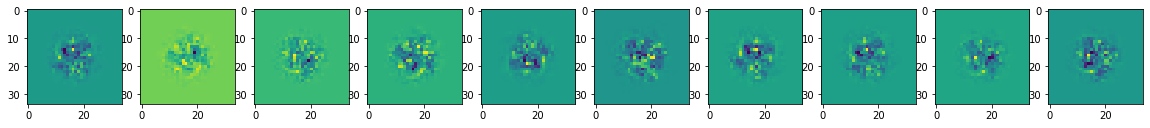

generated


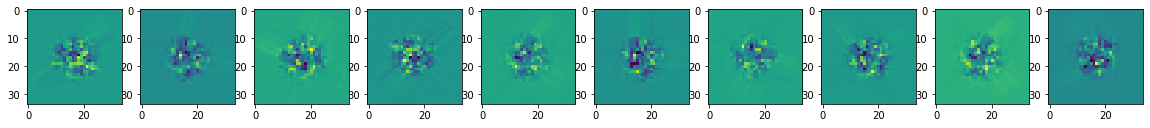

real


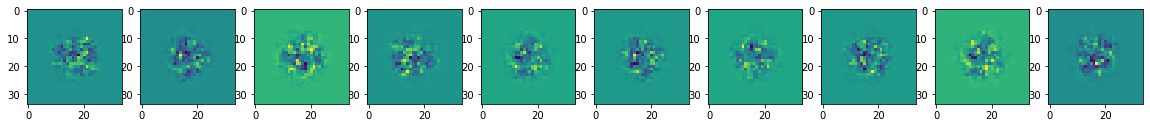

generated


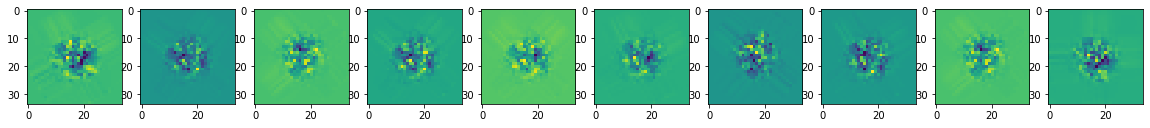

real


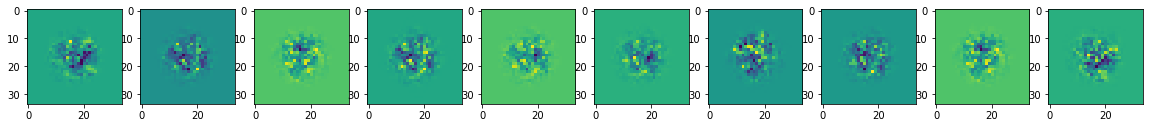

generated


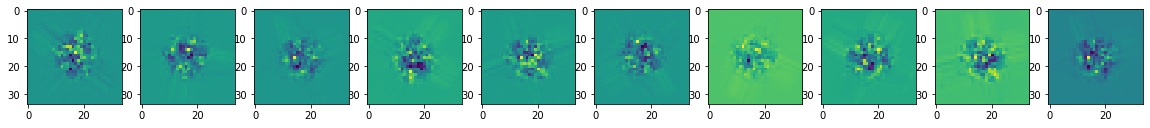

real


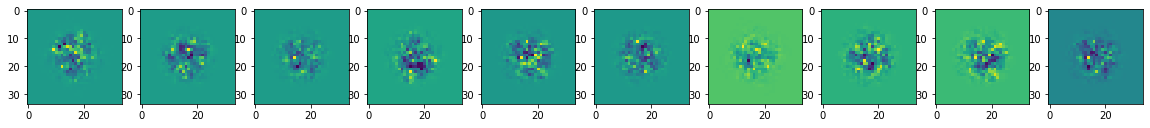

generated


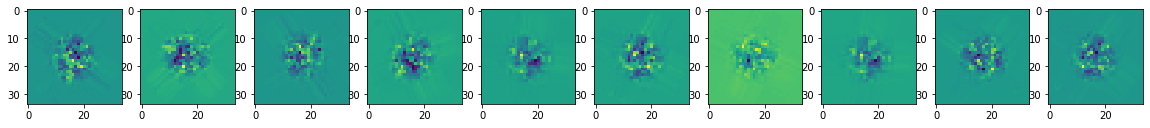

real


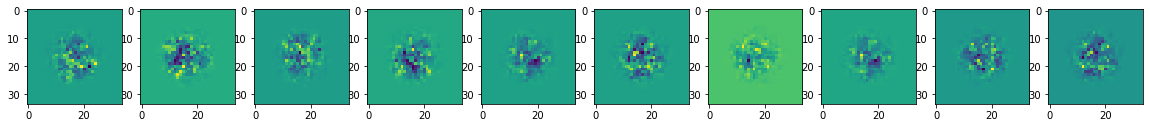

generated


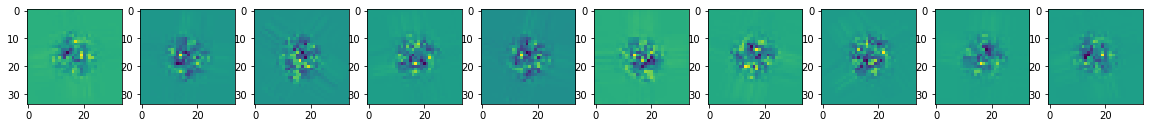

real


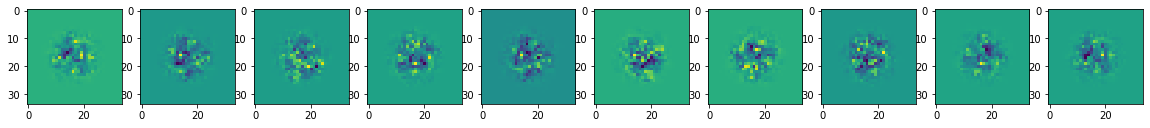

generated


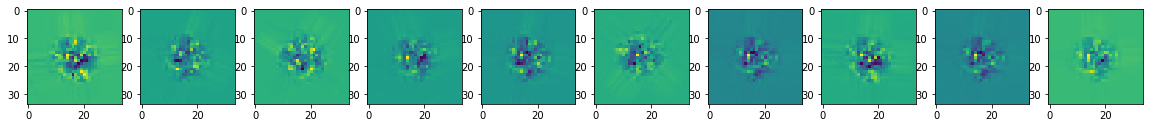

real


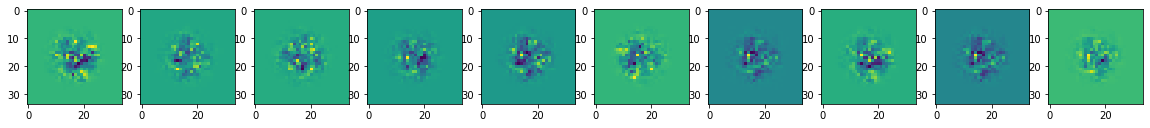

generated


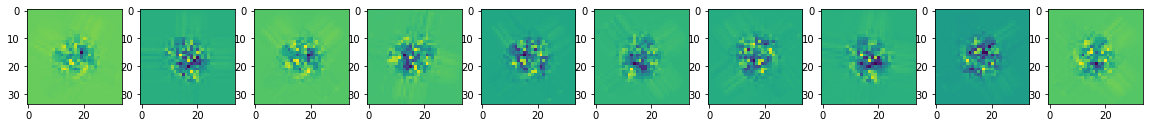

real


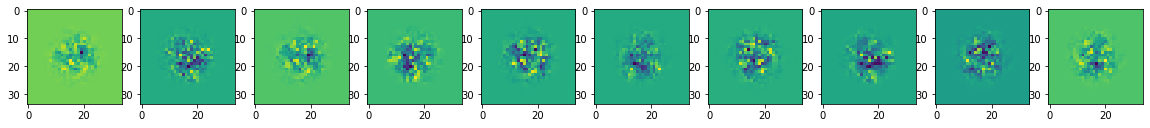

generated


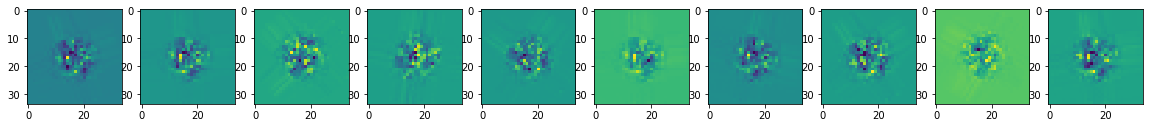

real


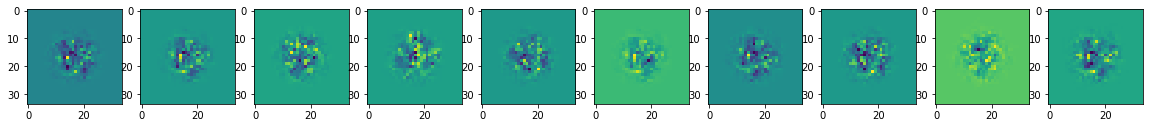

generated


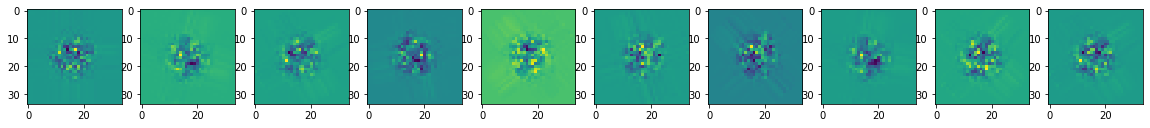

real


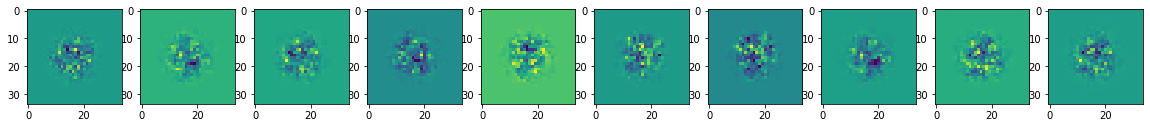

generated


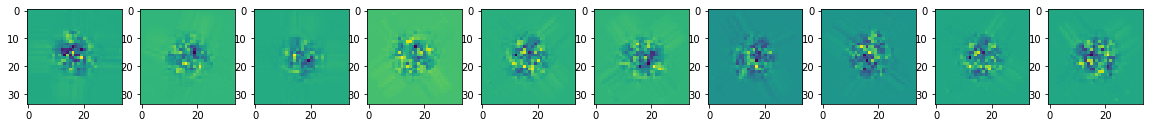

real


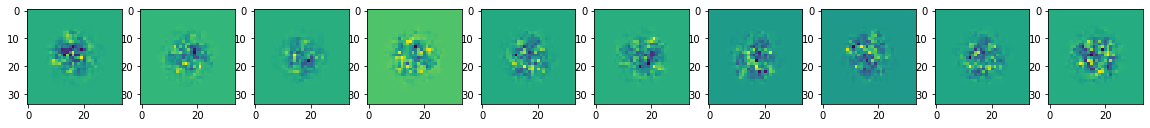

generated


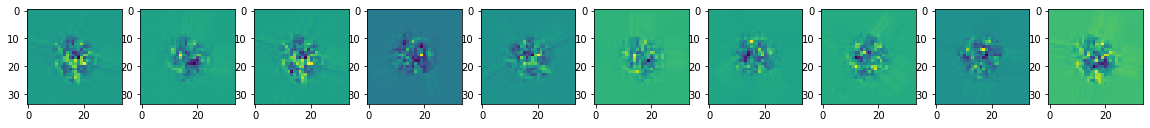

real


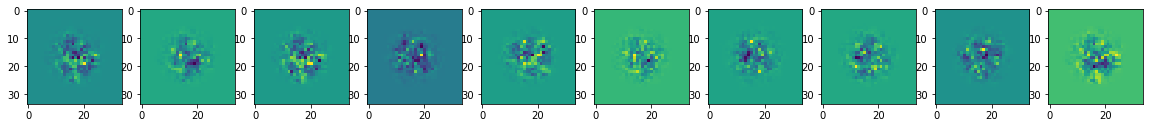

generated


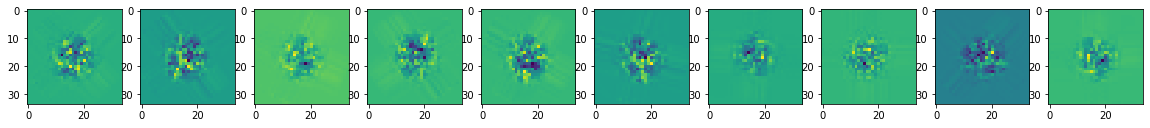

real


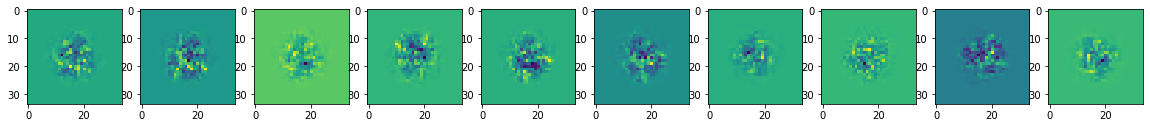

generated


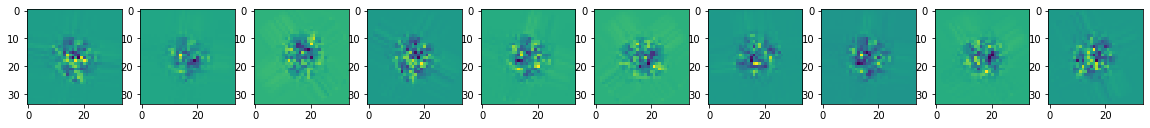

real


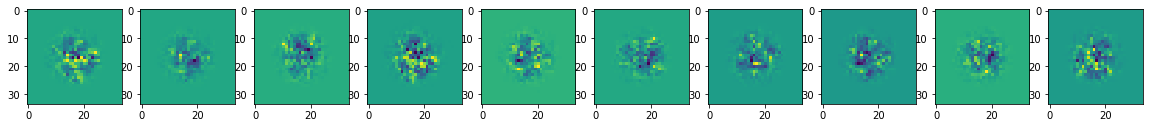

generated


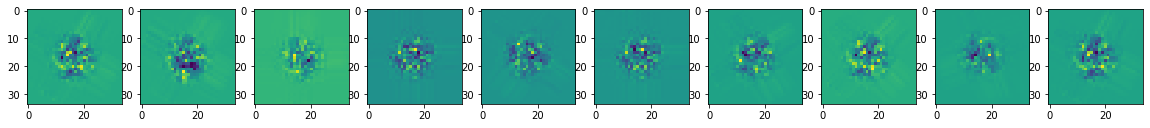

real


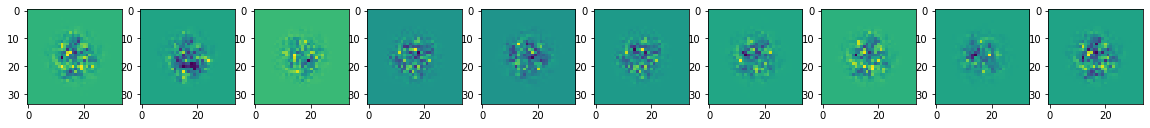

generated


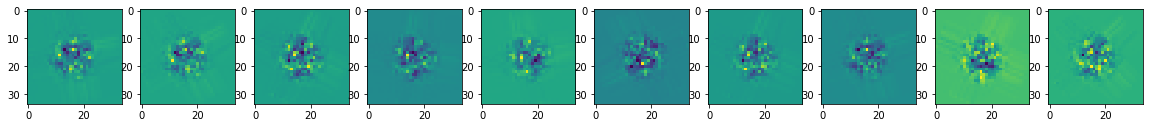

real


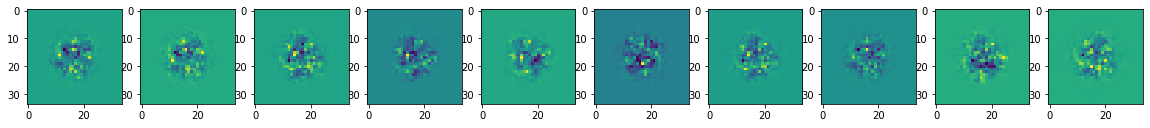

generated


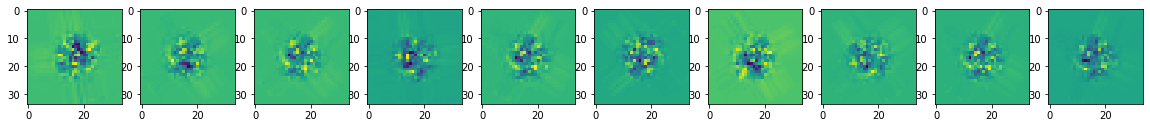

real


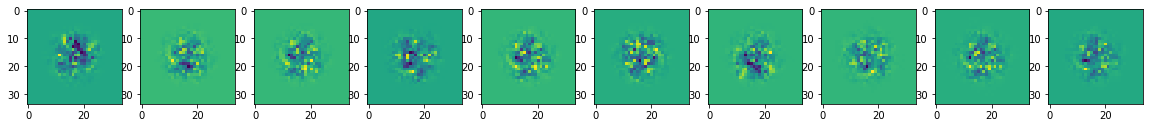

generated


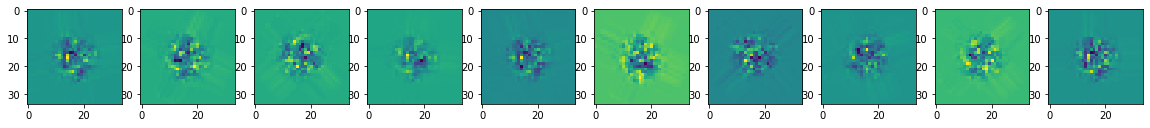

real


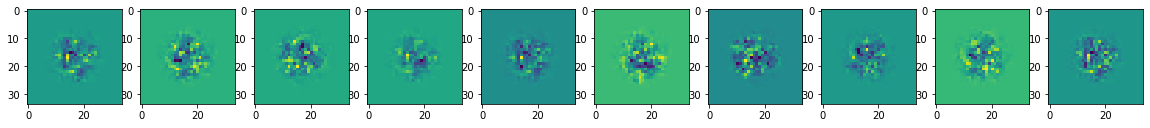

generated


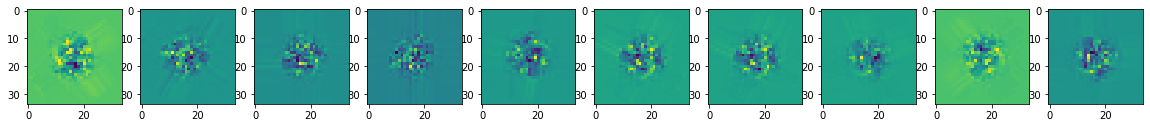

real


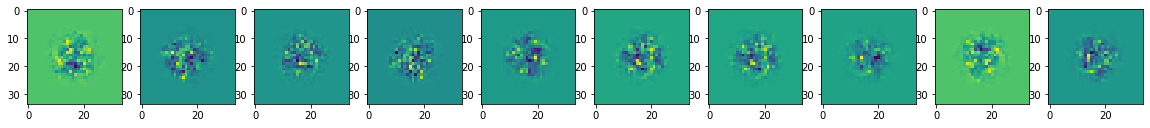

generated


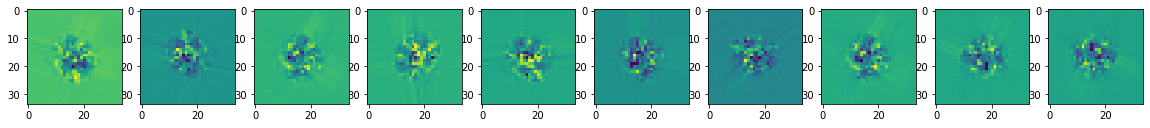

real


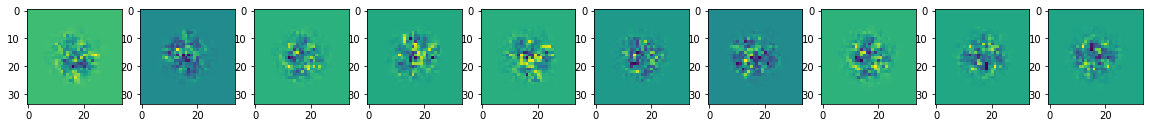

generated


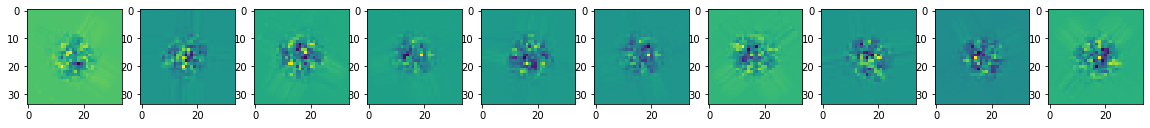

real


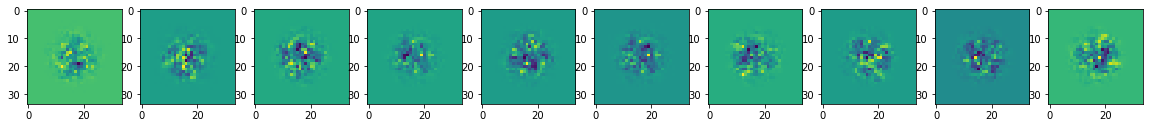

generated


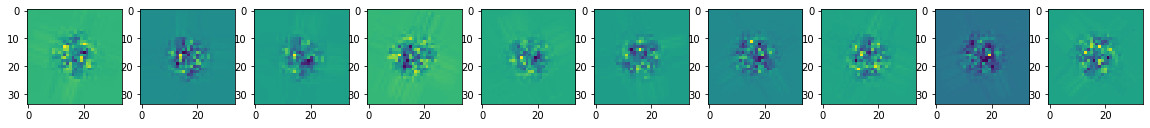

real


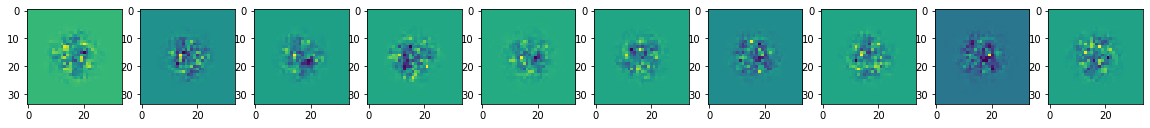

generated


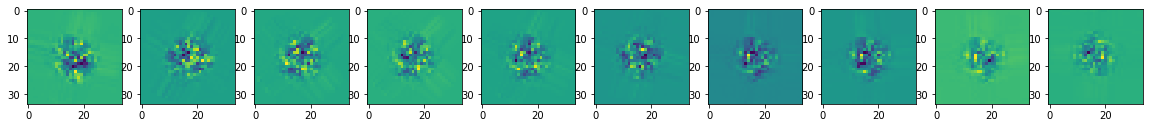

real


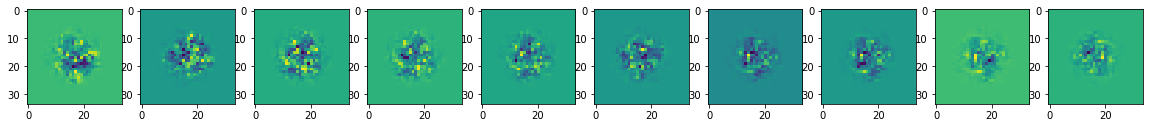

generated


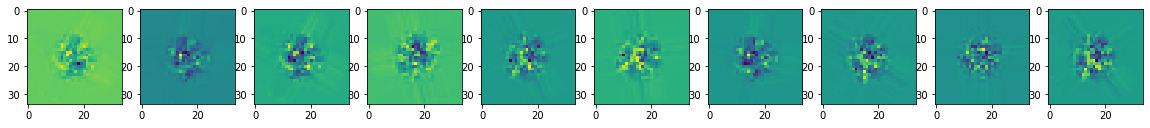

real


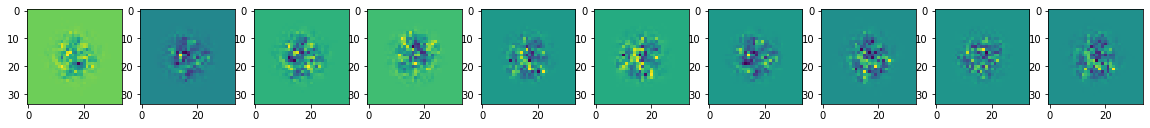

generated


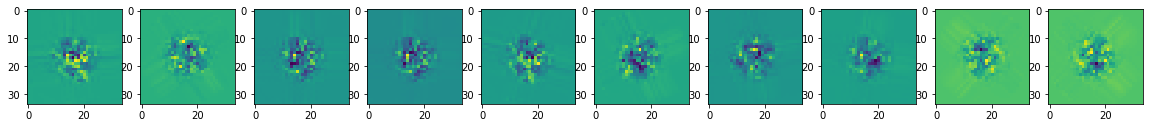

real


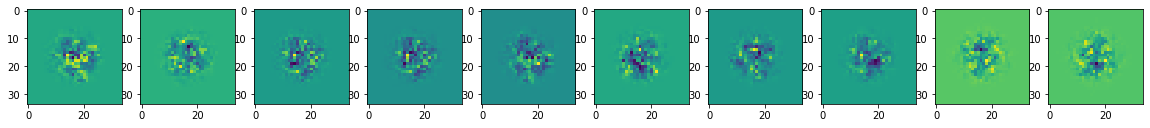

generated


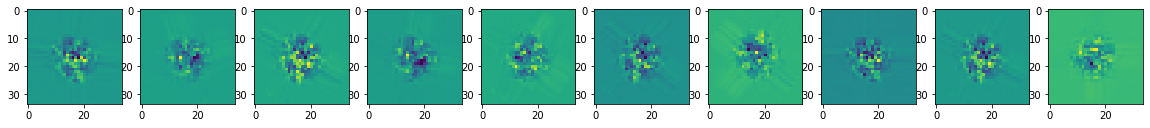

real


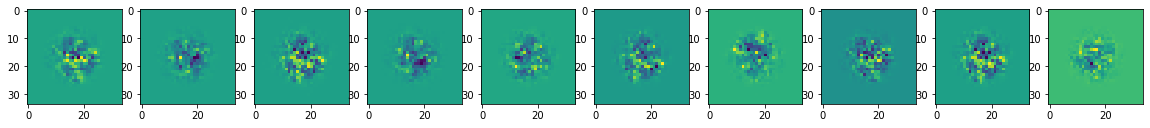

generated


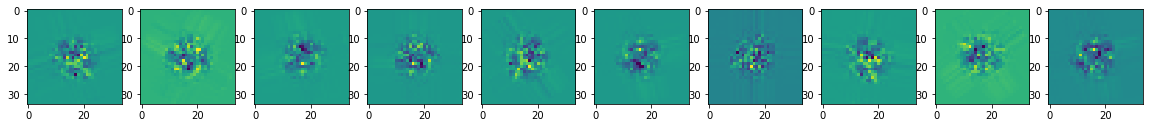

real


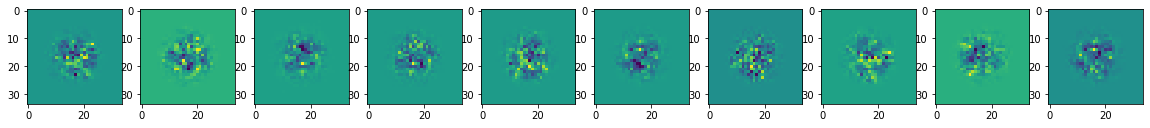

generated


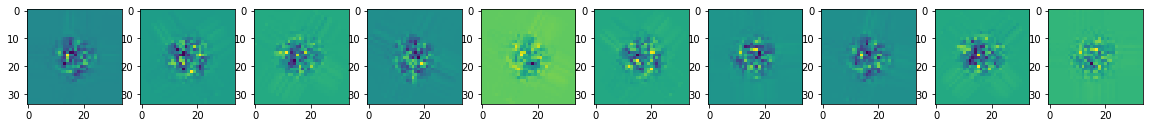

real


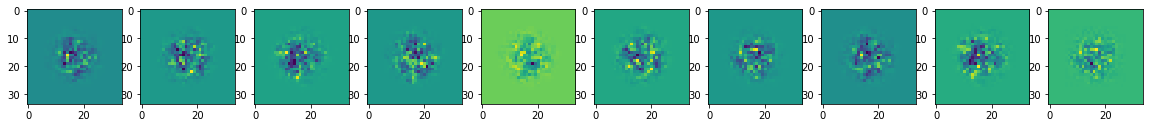

generated


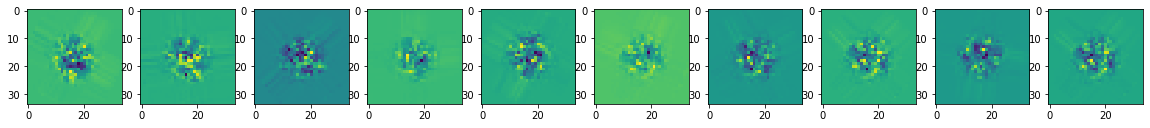

real


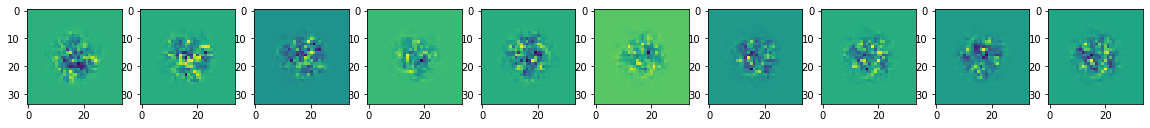

generated


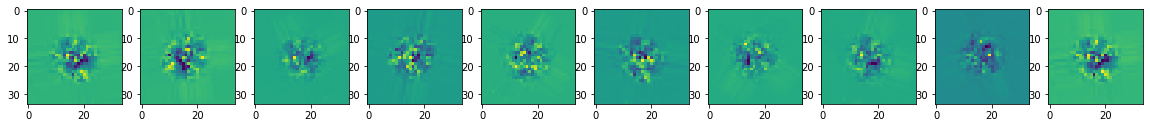

real


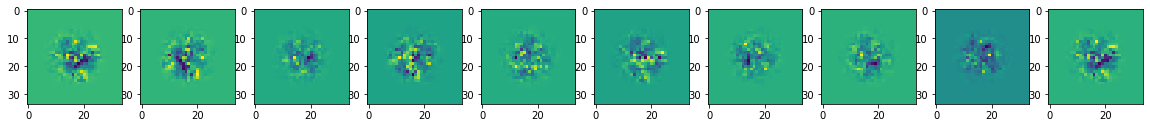

generated


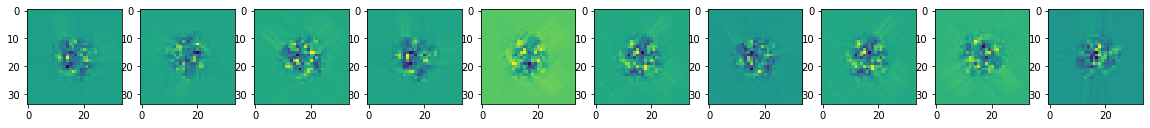

real


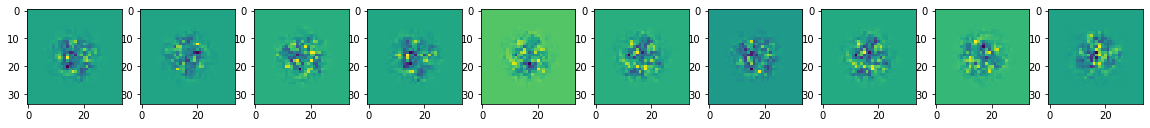

generated


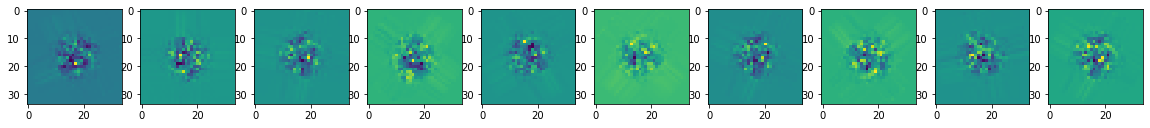

real


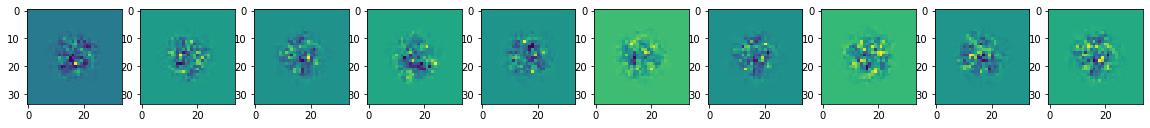

generated


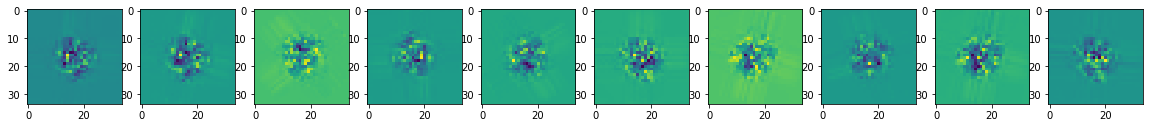

real


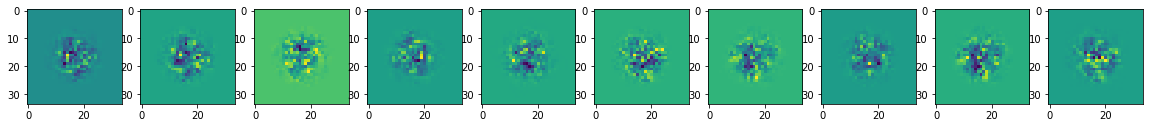

generated


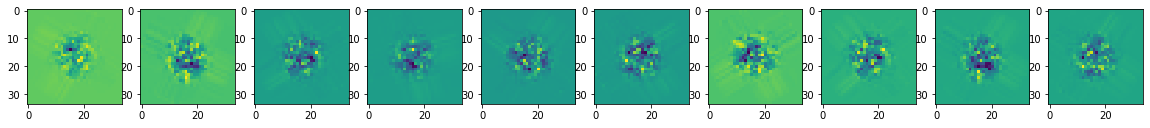

real


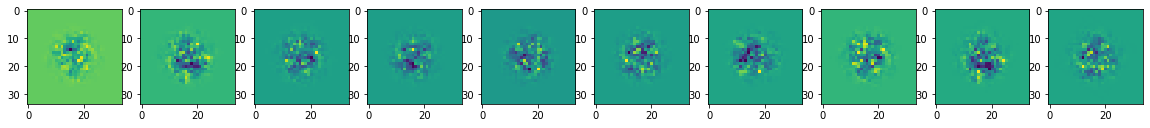

generated


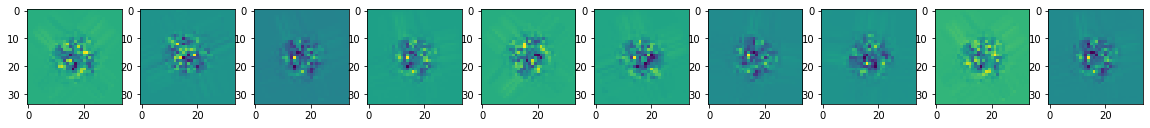

real


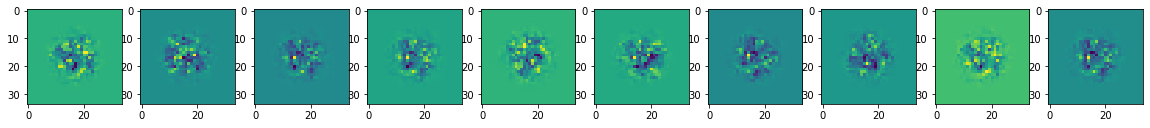

generated


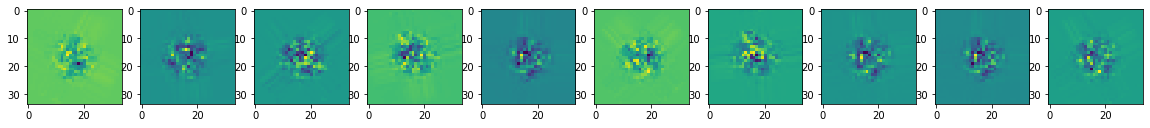

real


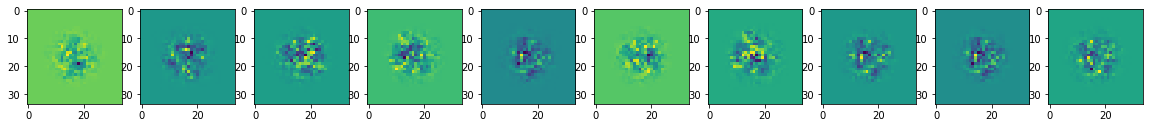

generated


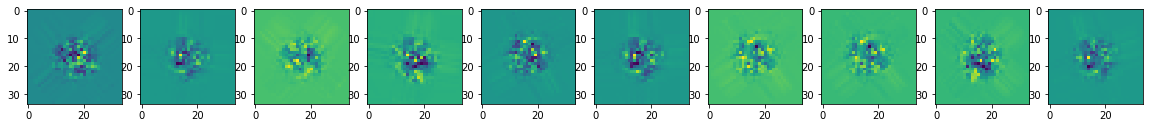

real


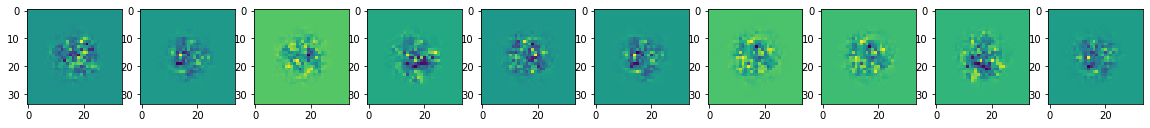

generated


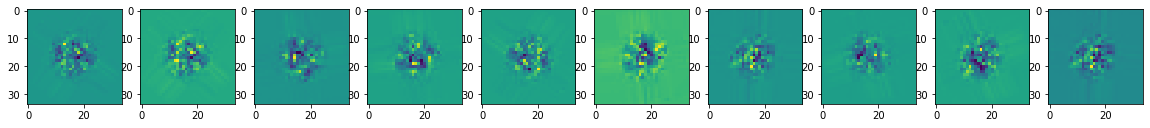

real


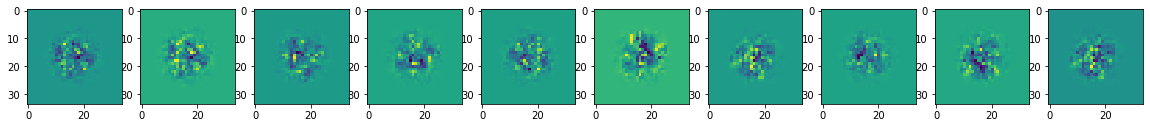

generated


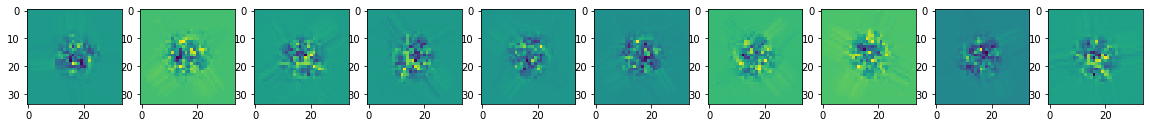

real


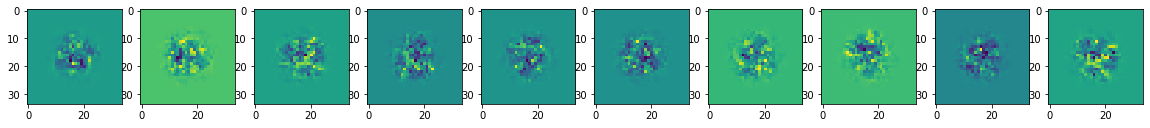

generated


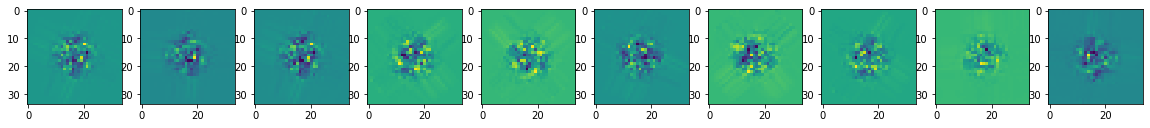

real


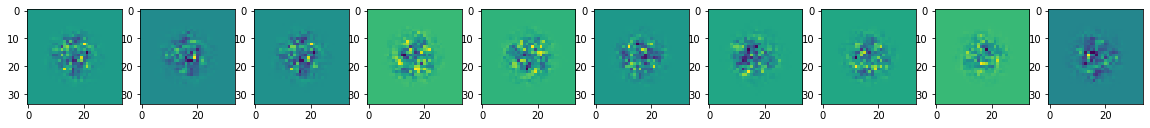

generated


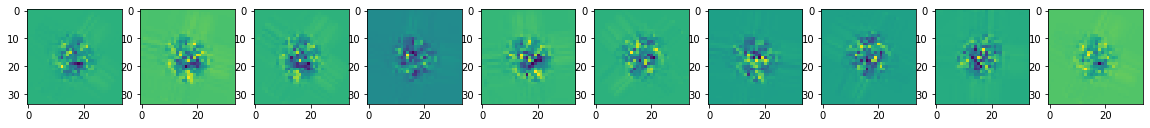

real


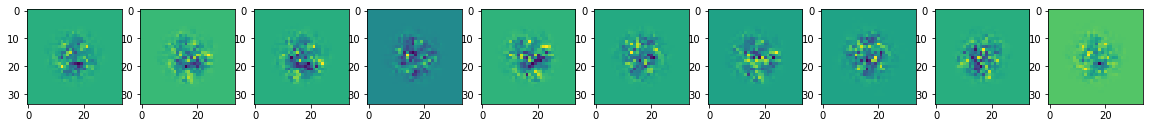

generated


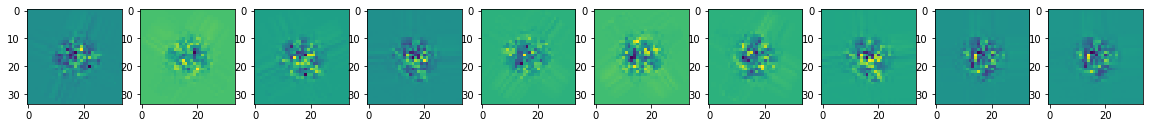

real


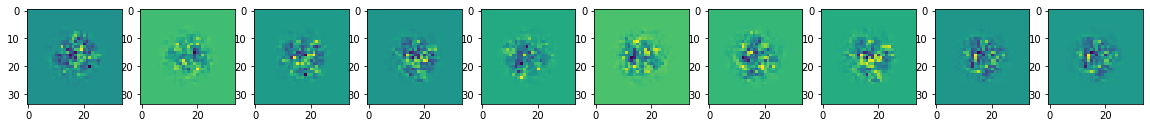

generated


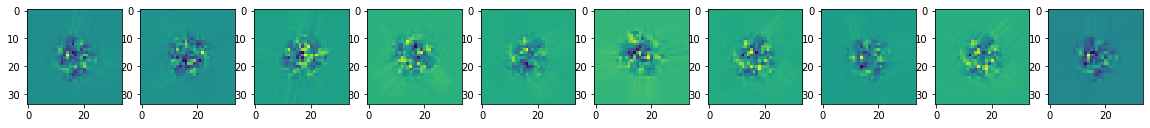

real


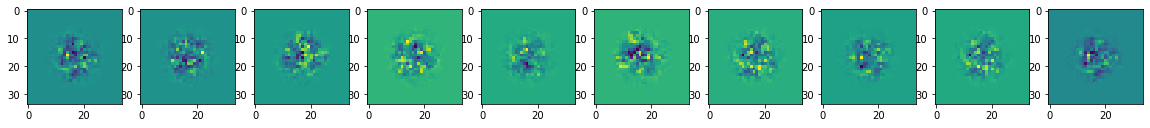

generated


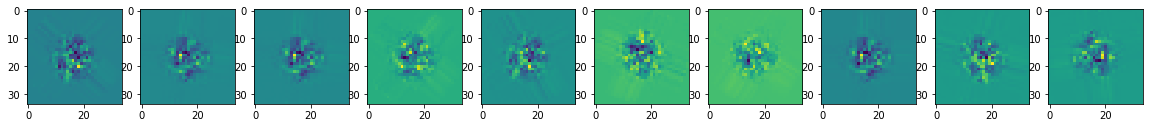

real


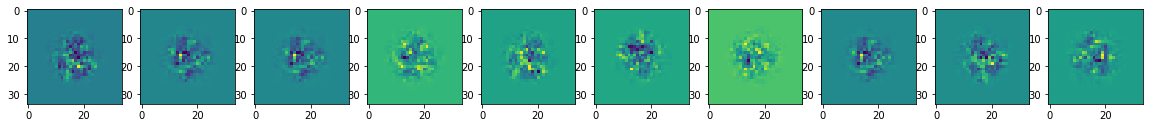

generated


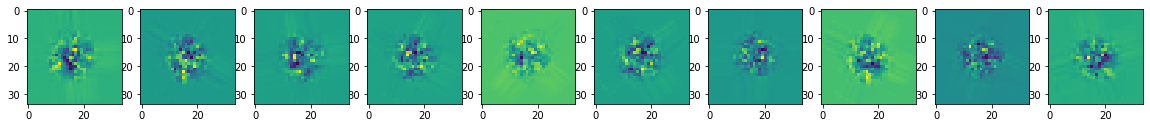

real


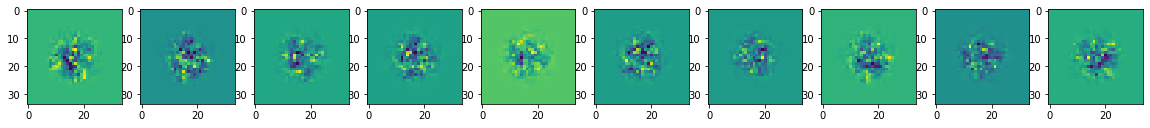

generated


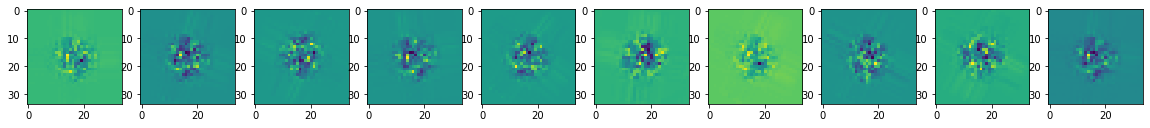

real


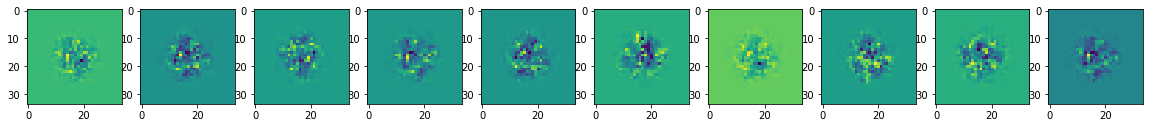

generated


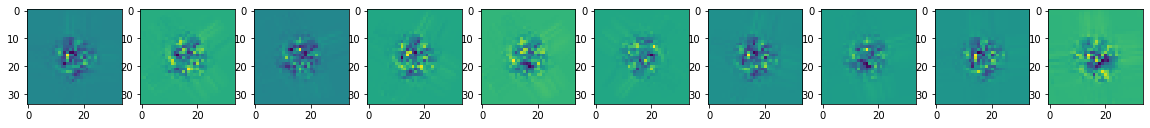

real


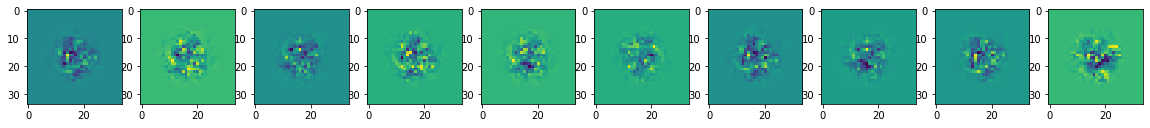

generated


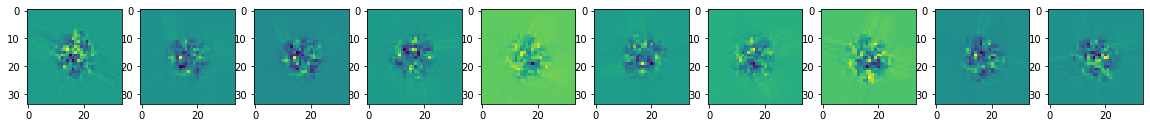

real


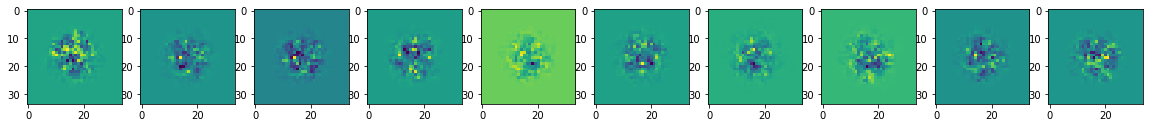

generated


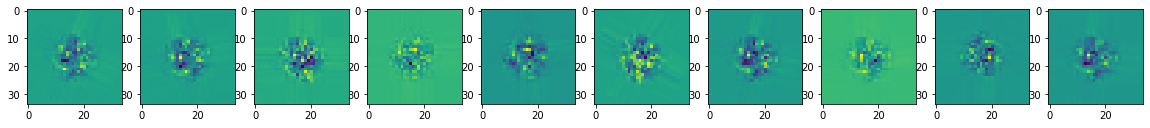

real


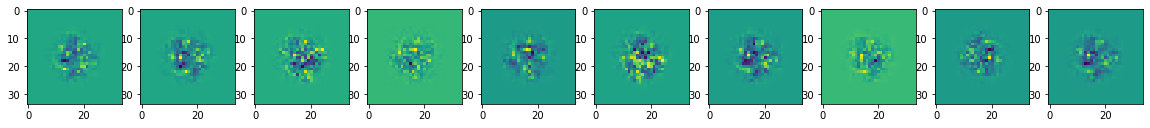

generated


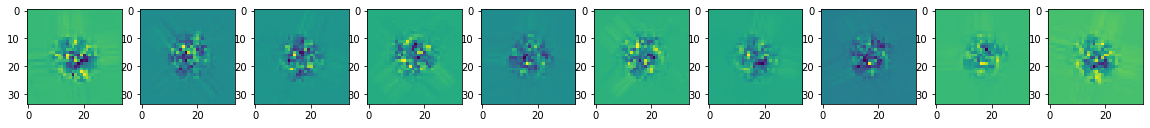

real


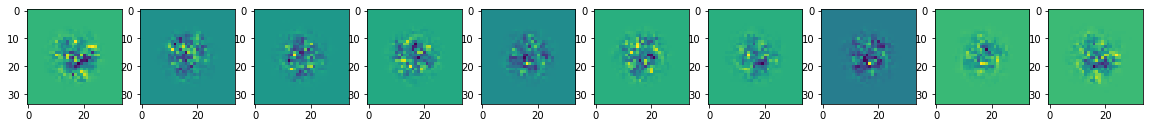

generated


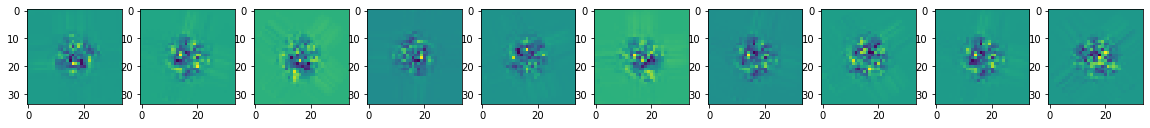

real


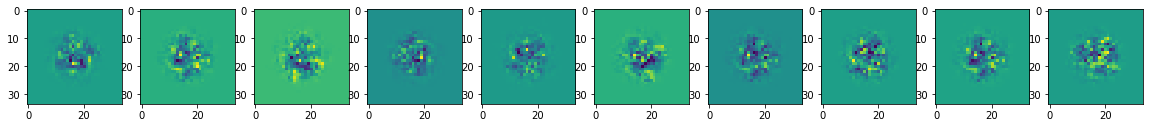

generated


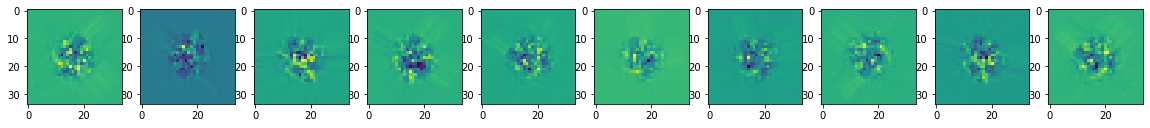

real


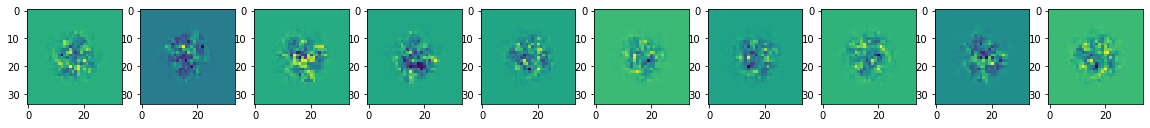

generated


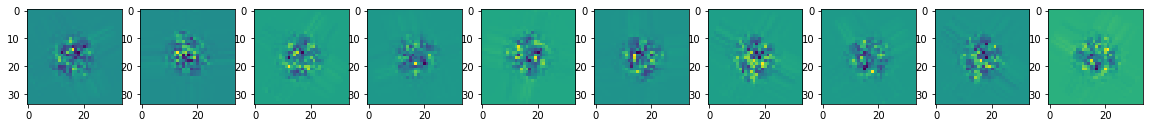

real


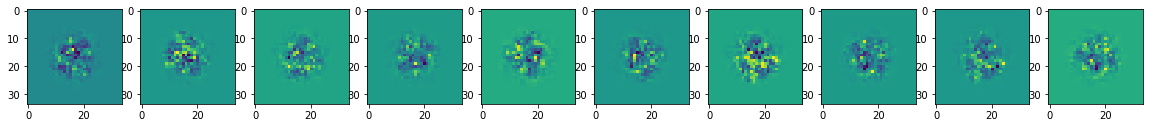

generated


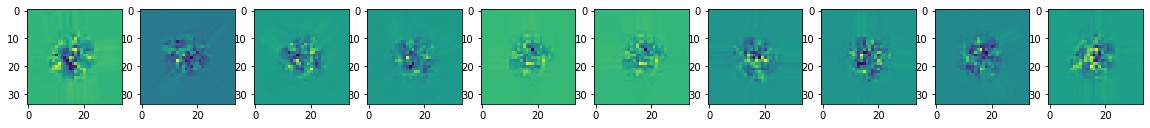

real


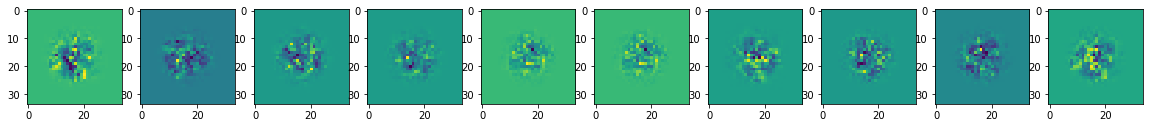

generated


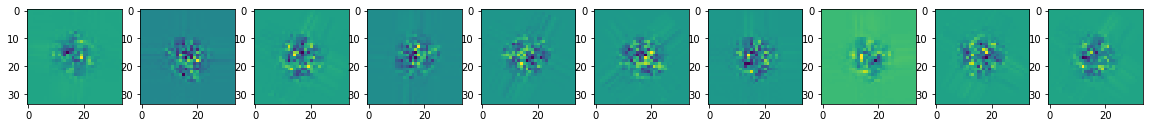

real


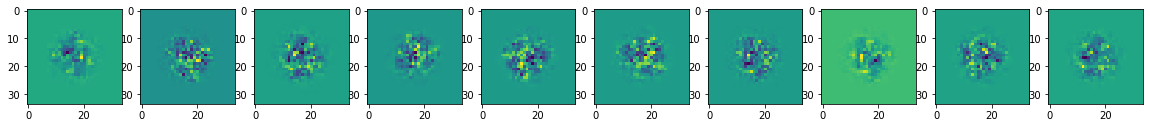

generated


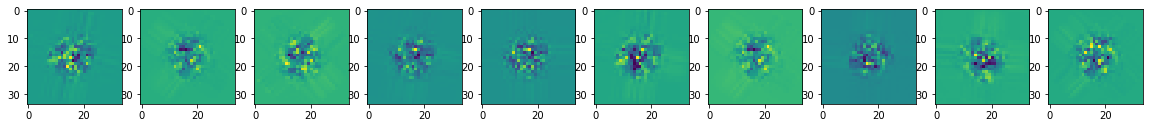

real


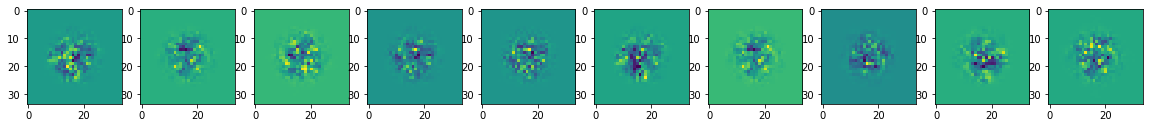

generated


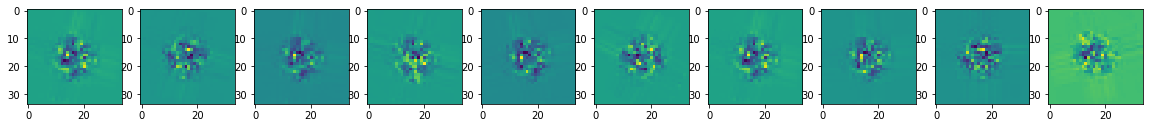

real


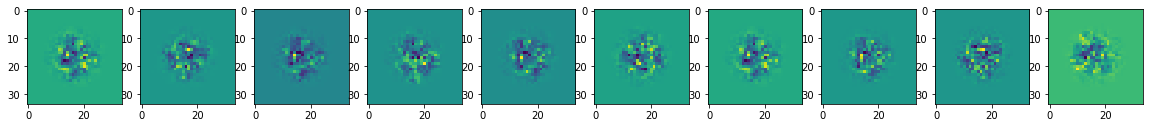

generated


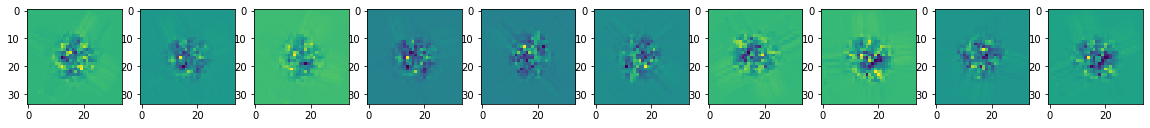

real


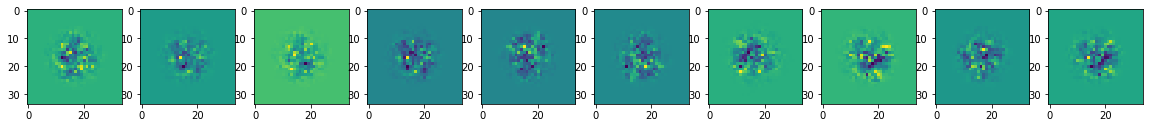

generated


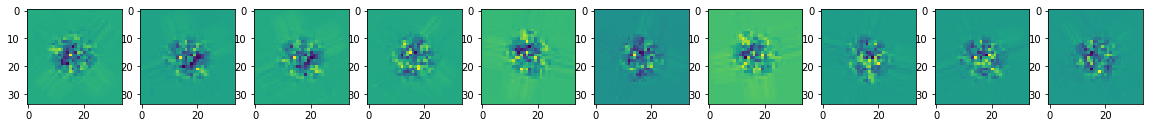

real


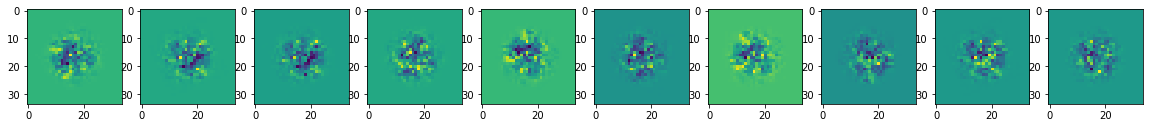

generated


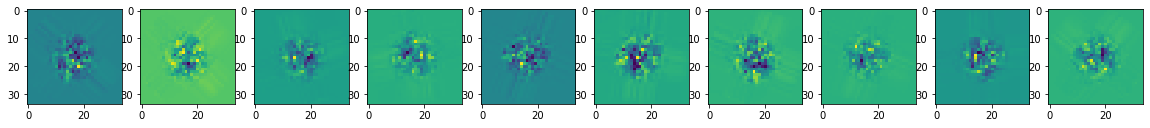

real


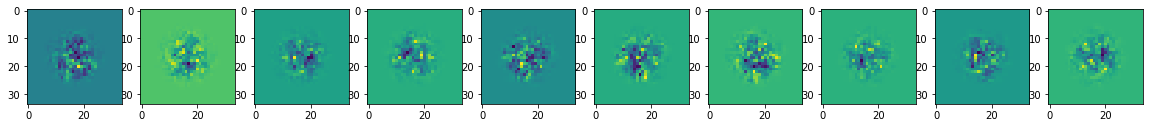

generated


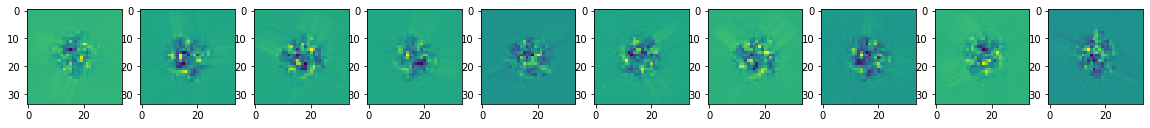

real


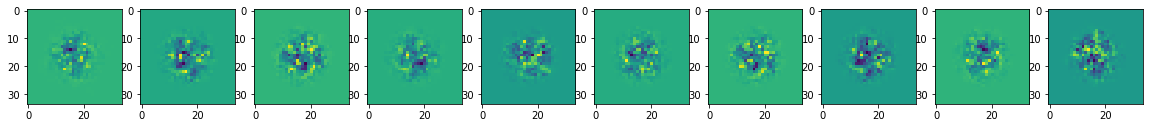

generated


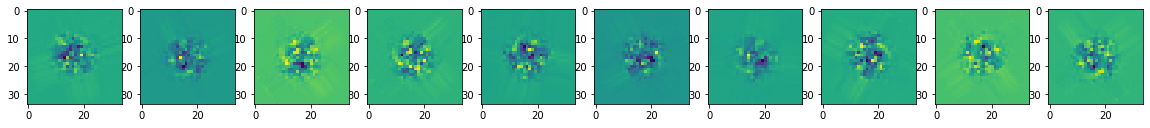

real


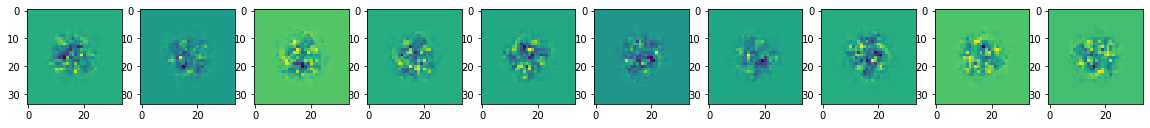

generated


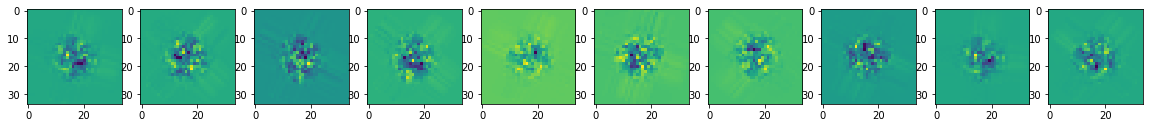

real


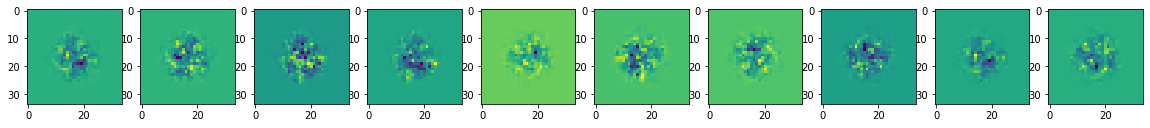

generated


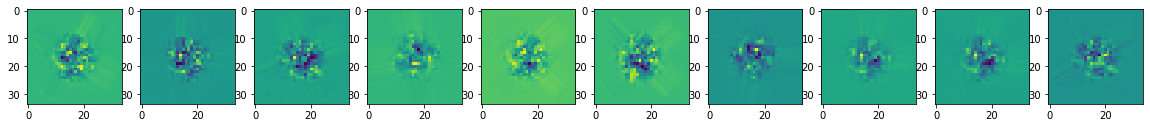

real


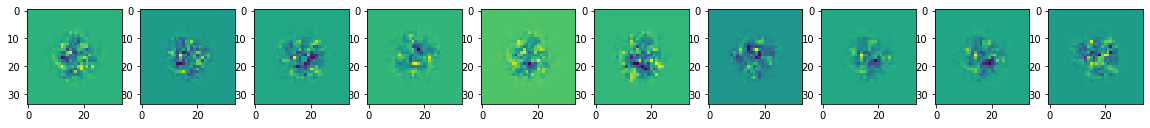

generated


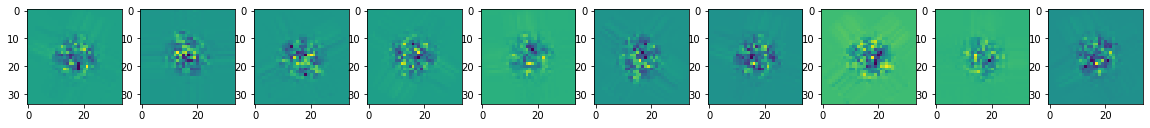

real


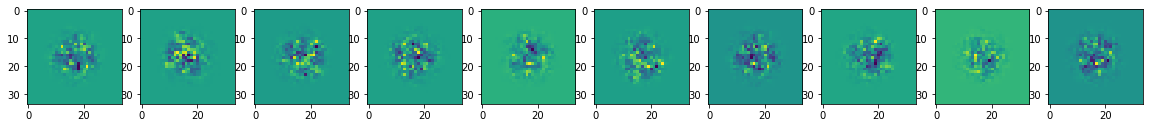

generated


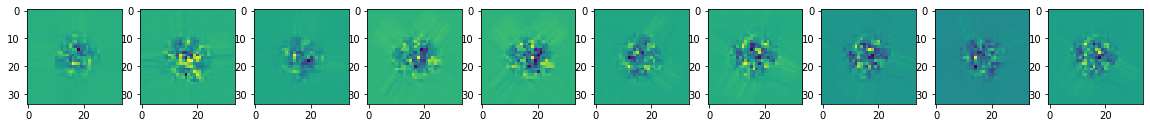

real


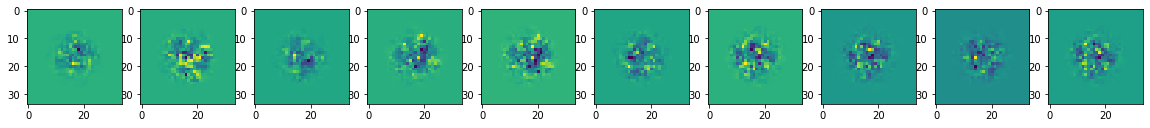

generated


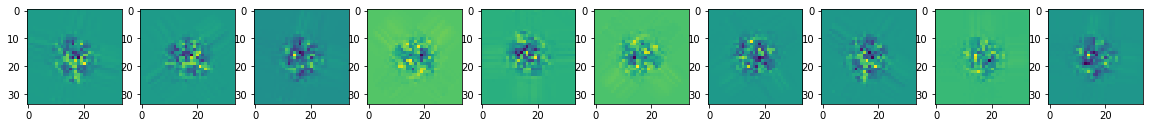

real


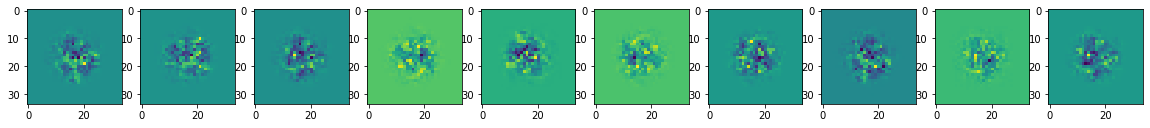

generated


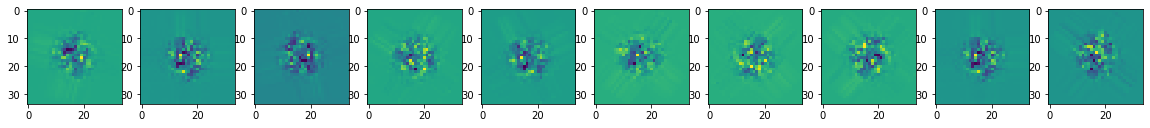

real


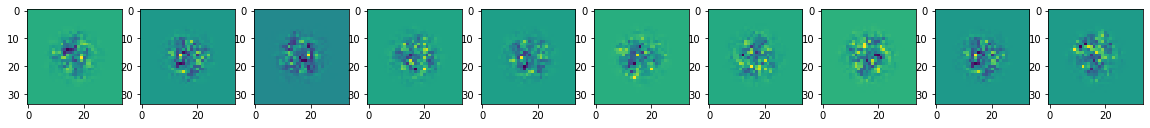

generated


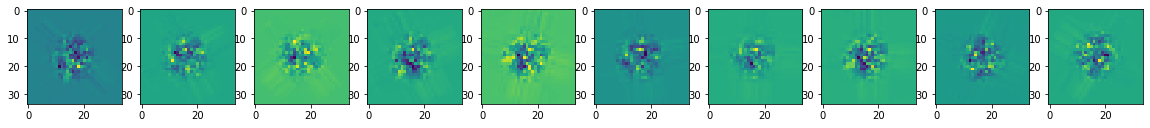

real


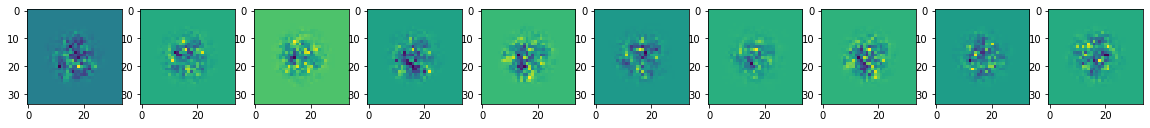

generated


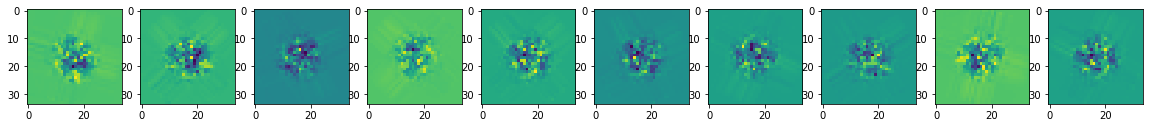

real


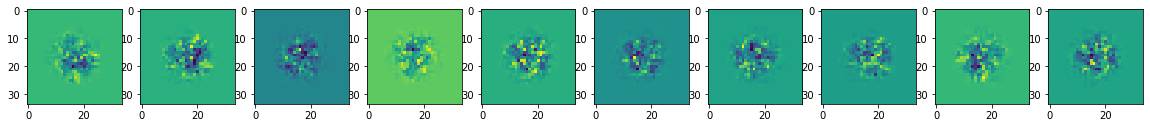

generated


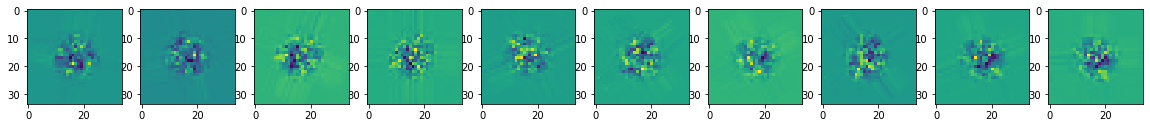

real


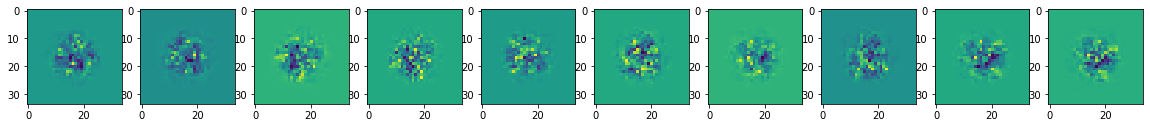

generated


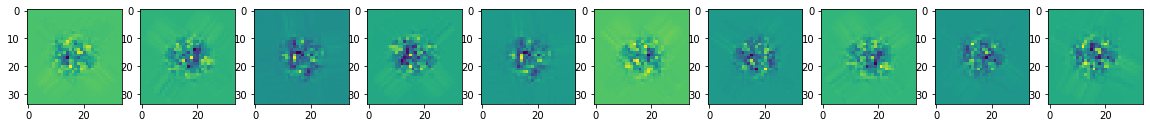

real


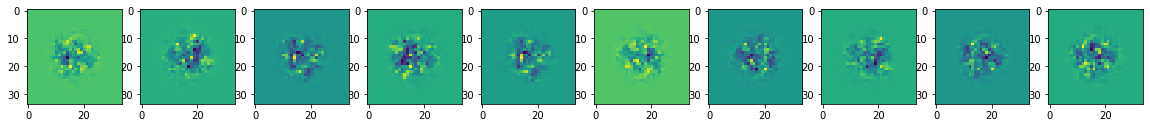

(9200, 10648, 1)


In [22]:
MP3.Output_colection()
Coef = np.array(MP3.All_mu)
#Then perform PCA of T-SNE on allMu
print(Coef.shape)

In [23]:
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  
tsne = TSNE(n_components=2, verbose=1, random_state=123)

"""
x = Coef.reshape(5000, -1)
z = tsne.fit_transform(x) 
"""


'\nx = Coef.reshape(5000, -1)\nz = tsne.fit_transform(x) \n'

In [30]:
import numpy as np
"""
np.random.seed(0)

indexs = np.random.randint(5, size = 5000)
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 

"""


'\nnp.random.seed(0)\n\nindexs = np.random.randint(5, size = 5000)\nprint(indexs[:10])\ndf = pd.DataFrame()\ndf["y"] = indexs\ndf["comp-1"] = z[:,0]\ndf["comp-2"] = z[:,1]\n\nsns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),\n                palette=sns.color_palette("hls", 5),\n                data=df).set(title="5Ribsome data true label") \n\n'

In [24]:
from sklearn.decomposition import PCA
print(Coef.shape)
Coef = Coef.reshape(9200, -1)
pca = PCA(n_components=5)
pca.fit(Coef)
P_Coef = pca.transform(Coef)
print(P_Coef.shape)

(9200, 10648, 1)
(9200, 5)


In [25]:
z = tsne.fit_transform(P_Coef) 
import numpy as np
np.random.seed(0)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9200 samples in 0.022s...
[t-SNE] Computed neighbors for 9200 samples in 0.329s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9200
[t-SNE] Computed conditional probabilities for sample 2000 / 9200
[t-SNE] Computed conditional probabilities for sample 3000 / 9200
[t-SNE] Computed conditional probabilities for sample 4000 / 9200
[t-SNE] Computed conditional probabilities for sample 5000 / 9200
[t-SNE] Computed conditional probabilities for sample 6000 / 9200
[t-SNE] Computed conditional probabilities for sample 7000 / 9200
[t-SNE] Computed conditional probabilities for sample 8000 / 9200
[t-SNE] Computed conditional probabilities for sample 9000 / 9200
[t-SNE] Computed conditional probabilities for sample 9200 / 9200
[t-SNE] Mean sigma: 0.863395
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.135170
[t-SNE] KL divergence after 1000 iterations: 0.626559
[3, 0, 2, 0, 2, 2, 0, 2, 4, 3]


ValueError: Length of values does not match length of index

(9200, 2)
9453
[3, 0, 2, 0, 2, 2, 0, 2, 4, 3]


[Text(0.5, 1.0, '5Ribsome data true label')]

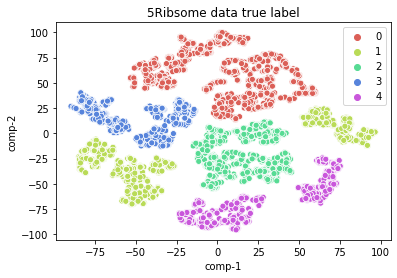

In [30]:
print(z.shape)
print(len(indexs))

indexs = Index_3DVA[:9200]
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 


[Text(0.5, 1.0, '5Ribsome data k-mean')]

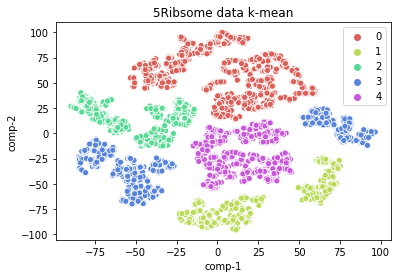

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(P_Coef) #k-mean perform on PCA coef
kmeans.labels_

df = pd.DataFrame()
df["y"] = kmeans.labels_
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data k-mean") 

In [32]:
from sklearn.metrics.cluster import v_measure_score
print(v_measure_score(indexs, kmeans.labels_))

0.9999999999999999
